# <font color=blue>Introduction to Linear Modeling in Python</font> 
One of the primary goals of any scientist is to find patterns in data and build models to describe, predict, and extract insight from those patterns. The most fundamental of these patterns is a linear relationship between two variables. This course provides an introduction to exploring, quantifying, and modeling linear relationships in data, by demonstrating techniques such as least-squares, linear regression, estimatation, and bootstrap resampling. Here you will apply the most powerful modeling tools in the python data science ecosystem, including scipy, statsmodels, and scikit-learn, to build and evaluate linear models. By exploring the concepts and applications of linear models with python, this course serves as both a practical introduction to modeling, and as a foundation for learning more advanced modeling techniques and tools in statistics and machine learning.

# <font color=red>01 - Exploring Linear Trends </font> 
 We start the course with an initial exploration of linear relationships, including some motivating examples of how linear models are used, and demonstrations of data visualization methods from matplotlib. We then use descriptive statistics to quantify the shape of our data and use correlation to quantify the strength of linear relationships between two variables. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Reasons for Modeling: Interpolation</h1><div class=""><p><p>One common use of modeling is interpolation to determine a value "inside" or "in between" the measured data points. In this exercise, you will make a prediction for the value of the dependent variable <code>distances</code> for a given independent variable <code>times</code> that falls "in between" two measurements from a road trip, where the distances are those traveled for the given elapse times.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/54e50fcc0edd78c85780200e6225902e8dd39b2c/ch01_ex02_fig02.png" alt="context figure"></p></div></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
distances_df = pd.read_csv('distances.txt')
times = distances_df.times.values
distances = distances_df.distances.values

In [3]:
# Compute the total change in distance and change in time
total_distance = distances[-1] - distances[0]
total_time = times[-1] - times[0]

# Estimate the slope of the data from the ratio of the changes
average_speed = total_distance / total_time

# Predict the distance traveled for a time not measured
elapse_time = 2.5
distance_traveled = average_speed * elapse_time
print("The distance traveled is {}".format(distance_traveled))

The distance traveled is 125.0


Notice that the answer distance is 'inside' that range of data values, so, less than the max(distances) but greater than the min(distances)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Reasons for Modeling: Extrapolation</h1><div class=""><p><p>Another common use of modeling <strong>extrapolation</strong> to estimate data values <em>"outside"</em> or <em>"beyond"</em> the range (min and max values of <code>time</code>) of the measured data. In this exercise, we have measured distances for times 0 through 5 hours, but we are interested in estimating how far we'd go in 8 hours. Using the same data set from the previous exercise, we have prepared a linear model <code>distance = model(time)</code>. Use that <code>model()</code> to make a prediction about the distance traveled for a time much larger than the other times in the measurements.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/ba7464321089e724e40b06c36532c176e237145f/ch01_ex03_fig02.png" alt="context figure"></p></div></div>

In [4]:
def model(time):
    return 50*time

In [5]:
# Select a time not measured.
time = 8

# Use the model to compute a predicted distance for that time.
distance = model(time)

# Inspect the value of the predicted distance traveled.
print(distance)

# Determine if you will make it without refueling.
answer = (distance <= 400)
print(answer)

400
True


Notice that the car can travel just to the range limit of 400 miles, so you'd run out of gas just as you completed the trip

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Reasons for Modeling: Estimating Relationships</h1><div class=""><p><p>Another common application of modeling is to <em>compare two data sets</em> by building models for each, and then <em>comparing the models</em>. In this exercise, you are given data for a road trip two cars took together. The cars stopped for gas every 50 miles, but each car did not need to fill up the same amount, because the cars do not have the same fuel efficiency (MPG). Complete the function <code>efficiency_model(miles, gallons)</code> to estimate efficiency as average miles traveled per gallons of fuel consumed. Use the provided dictionaries <code>car1</code> and <code>car2</code>, which both have keys <code>car['miles']</code> and <code>car['gallons']</code>.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/79778532773c5cee6fa1c29caff5d66bd4f798c3/ch01_ex04_fig03.png" alt="context figure"></p></div></div>

In [6]:
car1 = {'gallons': np.array([0, 1.66666667, 3.33333333,5,6.66666667, 8.33333333,10,11.66666667, 13.33333333, 15,  16.66666667]),
        'miles': np.array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,450.,  500.])}
car2 = {'gallons': np.array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
        'miles': np.array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400., 450.,  500.])}

In [7]:
# Complete the function to model the efficiency.
def efficiency_model(miles, gallons):
   return np.mean( miles / gallons )

# Use the function to estimate the efficiency for each car.
car1['mpg'] = efficiency_model( car1['miles'] , car1['gallons'] )
car2['mpg'] = efficiency_model( car2['miles'] , car2['gallons'] )

# Finish the logic statement to compare the car efficiencies.
if car1['mpg'] > car2['mpg'] :
    print('car1 is the best')
elif car1['mpg'] < car2['mpg'] :
    print('car2 is the best')
else:
    print('the cars have the same efficiency')

the cars have the same efficiency


<div class="dc-completed__message"><p class="">Correct! Notice the original plot that visualized the raw data was plot<em>gpm(), and the slope is 1/MPG and so car1 is steeper than car2, but if you call plot</em>mpg(gallons, miles) the slope is MPG, and so car2 has a steeper slope than car1</p></div>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plotting the Data</h1><div class=""><p><p>Everything in python is an object, even modules. Your goal in this exercise is to review the use of the object oriented interfaces to the python library <code>matplotlib</code> in order to visualize measured data in a more flexible and extendable work flow. The general plotting work flow looks like this:</p>
<pre><code>import matplotlib.pyplot as plt 
fig, axis = plt.subplots()
axis.plot(x, y, color="green", linestyle="--", marker="s")
plt.show()
</code></pre>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/e2d6e23eecfc94bada0015a19d18f993c35fcfba/ch01_ex06_fig01.png" alt="context figure"></p></div></div>

In [8]:
distances_df = pd.read_csv('distances2.csv')
times = distances_df.times.values
distances = distances_df.distances.values

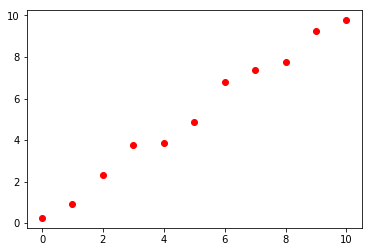

In [9]:
# Create figure and axis objects using subplots()
fig, axis = plt.subplots()

# Plot line using the axis.plot() method
line = axis.plot(times, distances, linestyle=" ", marker="o", color="red")

# Use the plt.show() method to display the figure
plt.show()

Good job! Notice how `linestyle=' '` means no line at all, just markers. Also note that your plot style is different than the context figure; I've hidden some more complex styling with title text and grid lines. More on that later! If you wish to experiment now, try different values for the style key-words to see the results. Set them to the requested values before submitting your answer

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plotting the Model on the Data</h1><div class=""><p><p>Continuing with the same measured data from the previous exercise, your goal is to use a predefined <code>model()</code> and measured data <code>times</code> and <code>measured_distances</code> to compute modeled distances, and then plot both measured and modeled data on the same axis.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/5bd0ccfd857b7c4b5870c2cf8401bdddd6f2633f/ch01_ex07_fig01.png" alt="context figure"></p></div></div>

In [10]:
def model(times, distances):
    return times*1
times = distances_df.times.values
measured_distances = distances_df.distances.values

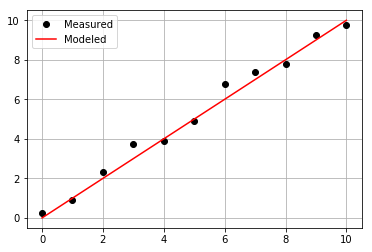

In [11]:
# Pass times and measured distances into model
model_distances = model(times, measured_distances)

# Create figure and axis objects and call axis.plot() twice to plot data and model distances versus times
fig, axis = plt.subplots()
axis.plot(times, measured_distances, linestyle=" ", marker="o", color="black", label="Measured")
axis.plot(times, model_distances,    linestyle="-", marker=None, color="red", label="Modeled")

# Add grid lines and a legend to your plot, and then show to display
axis.grid(True)
axis.legend(loc="best")
plt.show()

Notice a subtlety of python. 'None' is a special object that is often used as a place-holder to be replace by default values, so `linestyle=None` does not mean no line, it means the default which is a solid line style, whereas `marker=None` triggers the dafault marker, which happens to be no marker at all. If you use `color=None`, the resulting color will be blue, the default line color for matplotlib

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visually Estimating the Slope &amp; Intercept</h1><div class=""><p><p>Building linear models is an automated way of doing something we can roughly do "manually" with data visualization and a lot of trial-and-error. The visual method is not the most efficient or precise method, but it <em>does</em> illustrate the concepts very well, so let's try it! </p>
<p>Given some measured data, your goal is to guess values for slope and intercept, pass them into the model, and adjust your guess until the resulting model fits the data. Use the provided data <code>xd, yd</code>, and the provided function <code>model()</code> to create model predictions. Compare the predictions and data using the provided <code>plot_data_and_model()</code>.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/b10af870f99d87f8adad221ed091483ff57c4aae/ch01_ex08_fig01.png" alt=""></p></div></div>

In [12]:
def model(trial_intercept, trial_slope):
    xm = np.array([ -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,  -1. , -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,  4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. , 8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5, 13. ,  13.5,  14. ,  14.5,  15. ])
    ym = trial_intercept + xm * trial_slope
    return xm, ym

In [13]:
def plot_data_and_model(xd, yd, xm, ym):
    fig, axis = plt.subplots()
    axis.plot(xd, yd, linestyle=" ", marker="o", color="black", label="Measured")
    axis.plot(xm, ym, linestyle="-", marker=None, color="red", label="Modeled")
    axis.grid(True)
    axis.legend(loc="best")
    return fig

In [14]:
def plot_data(xd, yd):
    fig, axis = plt.subplots()
    axis.plot(xd, yd, linestyle=" ", marker="o", color="black", label="Measured")
    axis.grid(True)
    axis.legend(loc="best")
    return fig

In [15]:
xd = np.array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ])
yd = np.array([ 4.24835708,  4.43086785,  5.32384427,  6.26151493,  5.88292331,  6.38293152,  7.78960641,  7.88371736,  7.76526281,  8.77128002, 8.76829115])

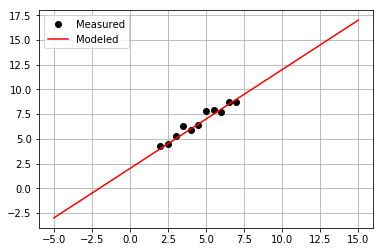

In [16]:
# Look at the plot data and guess initial trial values
trial_slope = 1
trial_intercept = 2

# input thoses guesses into the model function to compute the model values.
xm, ym = model(trial_intercept, trial_slope)

# Compare your your model to the data with the plot function
fig = plot_data_and_model(xd, yd, xm, ym)
plt.show()

# Repeat the steps above until your slope and intercept guess makes the model line up with the data.
final_slope = 1
final_intercept = 2

<div class="dc-completed__message"><p class="">Correct! Notice that you did not have to get the best values, <code>slope = 1</code> and <code>intercept = 2</code>, just something close. Models almost NEVER match the data exactly, and a model created from slightly different model parameters might fit the data equally well. We'll cover quantifying model performance and comparison in more detail later in this course!</p></div>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Mean, Deviation, &amp; Standard Deviation</h1><div class=""><p><p>The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize both. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will compute and visualize the normalized deviations of each array.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/a3f411c02f22e364363813ddf15864f061b7774a/ch01_ex10_fig01.png" alt=""></p></div></div>

In [17]:
x = np.array([3.20141089,3.57332076,4.2284669,4.27233051,4.49370529,4.5713193,4.74611933,4.9143694,5.06416613,5.12046366,5.1332596,5.1382451,5.19463348,5.30012277,5.32111385,5.361098,5.3622485,5.42139975,5.55601804,5.56564872,5.57108737,5.60910021,5.74438063,5.82636432,5.85993128,5.90529103,5.98816951,6.00284592,6.2829785,6.28362732,6.33858905,6.3861864,6.41291216,6.57380586,6.68822271,6.73736858,6.9071052,6.92746243,6.97873601,6.99734545,7.0040539,7.17582904,7.26593626,7.49073203,7.49138963,7.65143654,8.18678609,8.20593008,8.23814334,8.39236527])
y = np.array([146.48264883,167.75876162,229.73232314,205.23686657,224.99693822,239.79378267,246.65838372,264.14477475,268.91257002,267.25180588,248.54953839,265.25831322,263.03153004,251.08035094,280.93733241,276.53088378,268.59007072,268.62252076,265.21874,280.37743899,283.47297931,271.72788298,299.42217399,279.79758387,270.70401032,306.18168601,295.17313188,298.81898515,305.35499931,297.3187572,330.10944498,312.07619563,338.08560914,337.16702908,331.10617501,325.46645358,337.66440893,333.64162871,370.85149057,351.59390525,362.27985309,345.48425572,365.1976818,386.90415177,371.05186831,393.39852867,397.95134137,395.98005292,415.89087335,415.63691073])

In [18]:
def plot_cdfs(dx, dy, zx, zy):
    fig = plt.figure(figsize=(15,10))
    plt.subplot(211)
    plt.plot(dx)
    plt.plot(dy)
    plt.subplot(212)
    plt.plot(zx)
    plt.plot(zy)
    plt.show()
    return fig

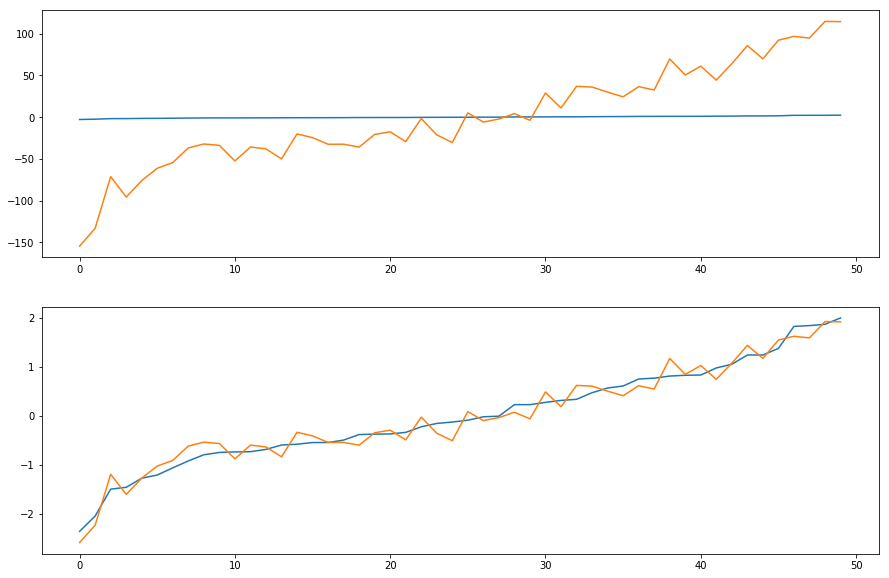

In [19]:
# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.std(x)
zy = dy / np.std(y)

# Plot comparisons of the raw data and the normalized data
fig = plot_cdfs(dx, dy, zx, zy)

 Notice how hard it is to compare dx and dy, versus comparing the normalized zx and zy.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Covariance vs Correlation</h1><div class=""><p><p>Covariance is a measure of whether two variables change ("vary") together. It is calculated by computing the products, point-by-point, of the deviations seen in the previous exercise, <code>dx[n]*dy[n]</code>, and then finding the average of all those products. </p>
<p>Correlation is in essence the normalized covariance. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will visualize and compute <strong>both</strong> the <code>covariance</code> and the <code>correlation</code>.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/a3f411c02f22e364363813ddf15864f061b7774a/ch01_ex10_fig01.png" alt=""></p></div></div>

In [20]:
def plot_normalized_deviations(zx, zy):
    plt.figure(figsize=(15,5))
    plt.plot(zx*zy)
    plt.title('Correlation = np.mean(zx*zy) = {:.2f}'.format(np.mean(zx*zy)))
    plt.xlabel('Array Index')
    plt.ylabel('Product of Normalized Deviations')
    plt.show()

Covariance:  69.67981827138166
Correlation:  0.9824333697735637


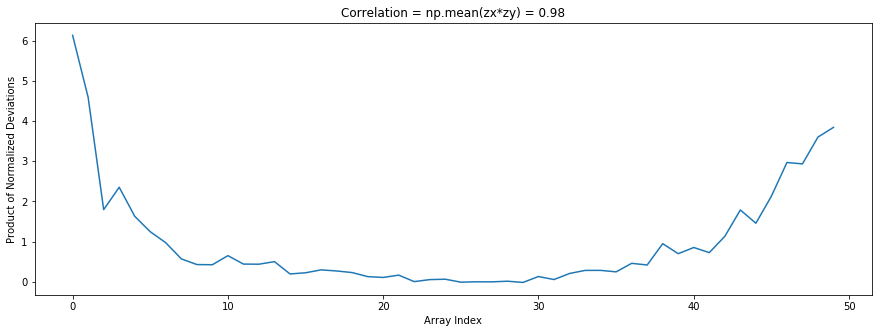

In [21]:
# Compute the covariance from the deviations.
dx = x - np.mean(x)
dy = y - np.mean(y)
covariance = np.mean(dx * dy)
print("Covariance: ", covariance)

# Compute the correlation from the normalized deviations.
zx = dx / np.std(x)
zy = dy / np.std(y)
correlation = np.mean(zx * zy)
print("Correlation: ", correlation)

# Plot the normalized deviations for visual inspection.
fig = plot_normalized_deviations(zx, zy)

Notice that you've plotted the product of the normalized deviations, and labeled the plot with the correlation, a single value that is the mean of that product. The product is always positive and the mean is typical of how the two vary together.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Correlation Strength</h1><div class=""><p><p>Intuitively, we can look at the plots provided and "see" whether the two variables seem to "vary together".</p>
<ul>
<li>Data Set A: x and y change together and appear to have a strong relationship.</li>
<li>Data Set B: there is a rough upward trend; x and y appear only loosely related.</li>
<li>Data Set C: looks like random scatter; x an y do not appear to change together and are unrelated.</li>
</ul>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/0b432ae4f447613dfef3143baa53fef637552cab/ch1_ex12_fig01.png" alt="Data Set A"></p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/a826178cf3d5132dbd64ea346eaf1233d113102d/ch1_ex12_fig02.png" alt="Data Set B"></p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/d07e0410be1912ba1bdbd3d091ea4f78f1a88cd9/ch1_ex12_fig03.png" alt="Data Set C"></p>
<p>Recall that deviations differ from the mean, and we normalized by dividing the deviations by standard deviation. In this exercise you will compare the 3 data sets by computing correlation, and determining which data set has the most strongly correlated variables x and y. Use the provided data table <code>data_sets</code>, a dictionary of records, each having keys 'name', 'x', 'y', and 'correlation'.</p></div></div>

In [22]:
data_sets={'A':{'correlation':"", 'x':np.array([2.55041235, 2.60839969, 2.79619981, 2.84385271, 3.15184751, 3.21906477, 3.23462037, 3.33976744, 3.47394544, 3.56125803, 3.67786134, 3.7339611, 3.86496991, 4.10019474, 4.24786673, 4.24920164, 4.29714059, 4.31952159, 4.41315702, 4.41783781, 4.42072788, 4.42420154, 4.62362038, 4.63538281, 4.70730828, 4.7073288, 4.71777962, 4.82716962, 4.85543965, 4.98312847, 5.08441026, 5.13865324, 5.21421035, 5.24607654, 5.26107949, 5.30245284, 5.39280917, 5.42952286, 5.46962252, 5.62089269, 5.67820005, 5.80961067, 5.92308322, 5.95929341, 6.02818114, 6.32140278, 6.83206096, 6.90378732, 6.97401602, 7.31534773]), 'y':np.array([5.18184568, 5.12052882, 5.42316911, 5.84062449, 6.5614449, 6.67094956, 6.25943637, 6.60223178, 7.03070673, 7.36640234, 7.23592912, 7.42150745, 7.45335607, 7.90133782, 8.69886493, 8.83746328, 8.57627865, 8.88992641, 8.91672304, 8.67439568, 8.93180467, 9.23291221, 9.23828425, 9.66192654, 8.75968029, 9.62013323, 9.45732102, 9.57958741, 9.73381949, 9.46936471, 10.11390254, 10.36658462, 10.79789421, 10.36258554, 10.32003559, 10.47946642, 11.01446886, 10.9412335, 10.80680499, 11.37010224, 11.3806695, 11.86138259, 11.67065318, 11.83667129, 11.95833524, 12.27692683, 13.73815199, 13.87283846, 13.9493104, 14.57204868])}, 
'B':{'correlation':"", 'x':np.array([2.19664381, 2.406278, 2.47343147, 2.72871597, 3.06636806, 3.51128038, 3.87855402, 4.09926408, 4.18003832, 4.20434562, 4.29194259, 4.41336839, 4.50269971, 4.58240329, 4.59650649, 4.60918513, 4.74669209, 4.77111432, 4.82900646, 4.84738553, 5.00264796, 5.01962047, 5.02286149, 5.04517742, 5.09524948, 5.15589119, 5.24177672, 5.26908573, 5.30974025, 5.36136493, 5.42179707, 5.50681676, 5.58929395, 5.69179864, 5.84444261, 5.94426748, 6.05209339, 6.07448552, 6.07964661, 6.10895368, 6.19165516, 6.23993253, 6.30742282, 6.30947322, 6.32371148, 6.43754466, 6.64768944, 6.65144774, 6.79088371, 7.98870064]), 'y':np.array([7.75732279, -0.97068431, -0.66103018, 5.05375913, 3.93976632, 6.44408273, 9.17318937, 8.05647607, 10.62302986, 14.59132646, 4.68693984, 8.54535728, 10.23727485, 8.33081153, 13.32821592, -0.38344428, 17.61579867, 4.97170349, 10.50554646, 12.51365356, 6.86355506, 11.88747988, 12.86263588, 12.18438671, 6.48548172, 18.34315419, 11.39140361, 5.92753502, 13.14739828, 10.8807806, 12.70116343, -3.24043311, 16.46301037, 11.99411949, 12.34700338, 10.16815219, 15.17366173, 16.0886504, 13.24263662, 17.78585212, 12.70267957, 10.88000673, 8.5034434, 10.28007359, 15.91379868, 12.5473011, 11.91631483, 15.41604806, 9.30581229, 13.92987605])}, 
'C':{'correlation':"", 'x':np.array([1.50176362, 1.96665095, 2.78558362, 2.84041313, 3.11713161, 3.21414912, 3.43264917, 3.64296175, 3.83020766, 3.90057957, 3.9165745, 3.92280638, 3.99329185, 4.12515346, 4.15139231, 4.2013725, 4.20281062, 4.27674969, 4.44502255, 4.45706091, 4.46385921, 4.51137526, 4.68047579, 4.7829554, 4.8249141, 4.88161379, 4.98521188, 5.00355739, 5.35372312, 5.35453415, 5.42323631, 5.482733, 5.5161402, 5.71725733, 5.86027839, 5.92171072, 6.13388149, 6.15932804, 6.22342001, 6.24668181, 6.25506737, 6.46978631, 6.58242032, 6.86341504, 6.86423703, 7.06429567, 7.73348261, 7.7574126, 7.79767917, 7.99045658]), 'y':np.array([-17.70183793, -12.68730947, 33.47056284, -7.0881775, 6.7091949, 23.53735376, 21.11660059, 35.3641024, 31.59072152, 24.91144186, -4.53019043, 20.56341545, 13.01493562, -12.96994045, 30.97956936, 21.31852956, 9.13346253, 4.82402639, -10.28277321, 12.10650699, 16.42274434, -4.27572923, 27.95621636, -7.98933795, -24.3197774, 26.39886103, 3.51656715, 7.99064142, -2.69282132, -14.98633586, 30.93027062, -0.05643774, 37.60752021, 24.35144564, 6.68442643, -5.53101698, 0.5483712, -7.08171402, 45.84065377, 15.1244233, 30.91342343, -7.33806017, 16.06140272, 32.57262109, 8.36830187, 30.62642269, -1.88612137, -6.30071951, 21.66576814, 9.91409021])}}

In [23]:
# Complete the function that will compute correlation.
def correlation(x,y):
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)
    x_norm = x_dev / np.std(x)
    y_norm = y_dev / np.std(y)
    return np.mean(x_norm * y_norm)

# Compute and store the correlation for each data set in the list.
for name, data in data_sets.items():
    data['correlation'] = correlation(data['x'], data['y'])
    print('data {} has correlation {}'.format(name, data['correlation']))

# Assign the data set with the best correlation.
best_data = data_sets['A']

data A has correlation 0.9956058673496954
data B has correlation 0.5411868140850752
data C has correlation 0.093390252922618


Note that the strongest relationship is in Dataset A, with correlation closest to 1.0 and the weakest is Datatset C with corrlation value closest to zero.

# <font color=red>02 - Building Linear Models </font> 
 Here we look at the parts that go into building a linear model. Using the concept of a Taylor Series, we focus on the parameters slope and intercept, how they define the model, and how to interpret the them in several applied contexts. We apply a variety of python modules to find the model that best fits the data, by computing the optimal values of slope and intercept, using least-squares, numpy, statsmodels, and scikit-learn. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Terms in a Model</h1><div class=""><p><p>Given a scatter plot of data, select the linear model that best fits the data. 
To test your answer, use the predefined function <code>fig = plot_data_with_model(a0, a1, a2)</code> to plot any general model you wish to try, where the coefficients are for a general model <code>y=a0 + a1*x + a2*x*x</code>, with all defaults set to zero.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/9577d9e670be94e2b58556d6e103dfac87d3db49/ch02_ex02_fig01_rev2.png" alt=""></p></div></div>


$y=250$

$y=100+200x$

$y=200+75x$

$y=100+75x$

$y=100+50x+3.25x^2$

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Model Components</h1><div class=""><p><p>Previously, you have been given a <strong><em>pre-defined</em></strong> model to work with. In this exercise, you will implement a model function that returns model values for <code>y</code>, computed from input <code>x</code> data, and any input coefficients for the "zero-th" order term <code>a0</code>, the "first-order" term <code>a1</code>, and a quadratic term <code>a2</code> of a model. Recall that "first order" is linear, so we'll set the defaults for this general linear model with <code>a2=0</code>, but later, we will change this for comparison.</p></div></div>

In [24]:
def plot_prediction(x, ym):
    fig, axis = plt.subplots()
    axis.plot(x,ym, 'r-o')
    plt.title('Plot of modeled Y for given X')
    plt.xlabel('X')
    plt.ylabel('Y')
    axis.grid(True)
    axis.axhline(linewidth=2, color='black')
    axis.axvline(linewidth=2, color='black')
    plt.show()
    return fig

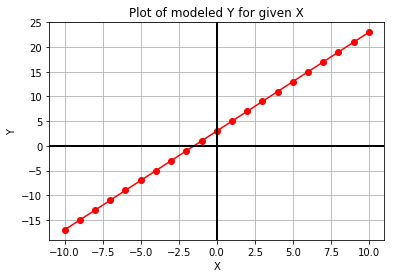

In [25]:
# Define the general model as a function
def model(x, a0=3, a1=2, a2=0):
    return a0 + (a1*x) + (a2*x*x)

# Generate array x, then predict ym values for specific, non-default a0 and a1
x = np.linspace(-10, 10, 21)
ym = model(x)

# Plot the results, ym versus x
fig = plot_prediction(x, ym)

<p class="">Correct! Notice that we used <code>model()</code> to compute predicted values of ym for given possibly measured values of x. The model takes the independent data and uses it to generate a model for the dependent variables corresponding values.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Model Parameters</h1><div class=""><p><p>Now that you've built a <strong><em>general</em></strong> model, let's "optimize" or "fit" it to a new (preloaded) measured data set, <code>xd, yd</code>, by finding the <strong><em>specific</em></strong> values for model parameters <code>a0, a1</code> for which the model data and the measured data line up on a plot. </p>
<p>This is an iterative visualization strategy, where we start with a <em>guess</em> for model parameters, pass them into the <code>model()</code>, over-plot the resulting modeled data on the measured data, and visually check that the line passes through the points. If it doesn't, we change the model parameters and try again.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/0e55d370f291374e0431de0caecb2a95e0186644/ch02_ex04_fig01.png" alt=""></p></div></div>

In [26]:
xd = np.linspace(0, 10, 21)
yd = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

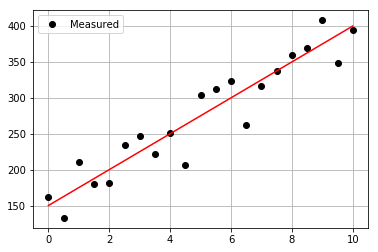

In [27]:
# Complete the plotting function definition
def plot_data_with_model(xd, yd, ym):
    fig = plot_data(xd, yd)  # plot measured y data
    fig.axes[0].plot(xd, ym, color='red')  # over-plot modeled y data
    plt.show()
    return fig

# Select new model parameters a0, a1, and generate modeled `ym` from them.
a0 = 150
a1 = 25
ym = model(xd, a0, a1)

# Plot the resulting model to see whether it fits the data
fig = plot_data_with_model(xd, yd, ym)

<p class="">Correct! Notice again that the measured x-axis data <code>xd</code> is used to generate the modeled y-axis data <code>ym</code> so to plot the model, you are plotting <code>ym</code> vs <code>xd</code>, which may seem counter-intuitive at first. But we are modeling the y response to a given x; we are not modeling x.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear Proportionality</h1><div class=""><p><p>The definition of temperature scales is related to the linear expansion of certain liquids, such as mercury and alcohol. Originally, these scales were literally rulers for measuring length of fluid in the narrow marked or "graduated" tube as a proxy for temperature. The alcohol starts in a bulb, and then expands linearly into the tube, in response to increasing temperature of the bulb or whatever surrounds it.  </p>
<p>In this exercise, we will explore the conversion between the Fahrenheit and Celsius temperature scales as a demonstration of interpreting slope and intercept of a linear relationship within a physical context.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/d2b4bffcd39b3b6034b4ed857f2b0dc8f47d936e/ch03_ex01_fig02.png" alt=""></p></div></div>

In [28]:
def plot_temperatures(temps_C, temps_F):
    fig, axis = plt.subplots()
    axis.plot(temps_C, temps_F)  
    plt.xlabel('Celcius')
    plt.ylabel('Fahrenheit ')
    axis.grid(True)
    plt.show()
    return fig

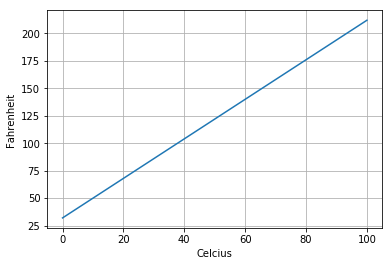

In [29]:
# Complete the function to convert C to F
def convert_scale(temps_C):
    (freeze_C, boil_C) = (0, 100)
    (freeze_F, boil_F) = (32, 212)
    change_in_C = boil_C - freeze_C
    change_in_F = boil_F - freeze_F
    slope = change_in_F / change_in_C
    intercept = freeze_F - freeze_C
    temps_F = intercept + (slope * temps_C)
    return temps_F

# Use the convert function to compute values of F and plot them
temps_C = np.linspace(0, 100, 101)
temps_F = convert_scale(temps_C)
fig = plot_temperatures(temps_C, temps_F)

Compare your plot with the one that was pre-loaded at the beginning of the exercise. Do they match?

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Slope and Rates-of-Change</h1><div class=""><p><p>In this exercise, you will model the motion of a car driving (roughly) constant velocity by computing the average velocity over the entire trip. The linear relationship modeled is between the time elapsed and the distance traveled. </p>
<p>In this case, the model parameter <code>a1</code>, or slope, is approximated or "estimated", as the mean velocity, or put another way, the "rate-of-change" of the distance ("rise") divided by the time ("run").</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/417073ac3c8000457321f38f6deda3c0e16b7984/ch03_ex03_fig01.png" alt=""></p></div></div>

In [30]:
df = pd.read_csv('./data/hiking_data.csv')
distances = df.distance.values
times = df.time.values

In [31]:
distances = np.array([   0.13536211,    4.11568697,    8.28931902,   12.41058595, 16.73878397,   20.64153844,   25.14540098,   29.10323276, 33.35991992,   37.47921914,   41.78850899,   45.66165494, 49.9731319 ,   54.13466214,   58.42781412,   62.40834239, 66.65229765,   70.76017847,   75.00351781,   79.2152346 , 83.24161507,   87.59539364,   91.74179923,   95.87520786, 100.07507133])
times = np.array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333, 0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      , 0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667, 1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333, 1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])

In [32]:
def plot_velocity_timeseries(times, velocities):
    a0 = v_avg
    a1 = 0
    ym = model(times, a0, a1)
    fig = plot_data(times, velocities)  # plot measured y data
    fig.axes[0].plot(times, ym, color='red')  # over-plot modeled y data
    plt.ylim(0,100)
    plt.show()
    return fig

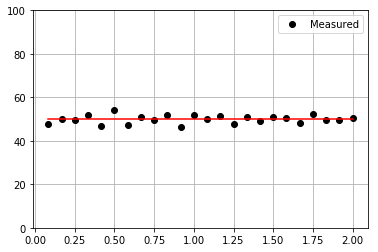

In [33]:
# Compute an array of velocities as the slope between each point
diff_distances = np.diff(distances)
diff_times = np.diff(times)
velocities = diff_distances / diff_times

# Chracterize the center and spread of the velocities
v_avg = np.mean(velocities)
v_max = np.max(velocities)
v_min = np.min(velocities)
v_range = v_max - v_min

# Plot the distribution of velocities
fig = plot_velocity_timeseries(times[1:], velocities)

<p class="">Correct! Generally we might use the average velocity as the slope in our model. But notice that there is some random variation in the instantaneous velocity values when plotted as a time series. The range of values <code>v_max - v_min</code> is one measure of the scale of that variation, and the standard deviation of velocity values is another measure. We see the implications of this variation in a model parameter in the next chapter of this course when discussing inference.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Intercept and Starting Points</h1><div class=""><p><p>In this exercise, you will see the intercept and slope parameters in the context of modeling measurements taken of the volume of a solution contained in a large glass jug. The solution is composed of composed of water, grains, sugars, and yeast. The total mass of both the solution and the glass container was also recorded, but the empty container mass was not noted. </p>
<p>Your job is to use the preloaded pandas DataFrame <code>df</code>, with data columns <code>volumes</code> and <code>masses</code> to build a linear model that relates the <code>masses</code> (y-data) to the <code>volumes</code> (x-data). The slope will be an estimate of the density (change in mass / change in volume) of the solution, and the intercept will be an estimate of the empty container weight (mass when volume=0).</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/9937537805654245b5e6fccb309cfa0ac8ed516c/ch03_ex04_fig03.png" alt=""></p></div></div>

solution_data

In [34]:
df = pd.read_csv('./data/solution_data.csv', skiprows=5) 

In [35]:
# Import ols from statsmodels, and fit a model to the data
from statsmodels.formula.api import ols
model_fit = ols(formula="masses ~ volumes", data=df)
model_fit = model_fit.fit()

# Extract the model parameter values, and assign them to a0, a1
a0 = model_fit.params['Intercept']
a1 = model_fit.params['volumes']

# Print model parameter values with meaningful names, and compare to summary()
print( "container_mass   = {:0.4f}".format(a0) )
print( "solution_density = {:0.4f}".format(a1) )
print( model_fit.summary() )

container_mass   = 5.4349
solution_density = 1.1029
                            OLS Regression Results                            
Dep. Variable:                 masses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.328e+05
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          1.19e-156
Time:                        10:01:41   Log-Likelihood:                 102.39
No. Observations:                 101   AIC:                            -200.8
Df Residuals:                      99   BIC:                            -195.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


<p class="">Correct! You deserve a cold beverage for all that work! Did you find the model parameter values for intercept and slope in the <code>.summary()</code>? Which one is the empty container mass? Which one is the solution density? Don't worry about everything in the summary output at first glance. We'll see more of it later. For now, it's good enough to try to find the slope and intercept values.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Residual Sum of the Squares</h1><div class=""><p><p>In a previous exercise, we saw that the altitude along a hiking trail was roughly fit by a linear model, and we introduced the concept of <strong><em>differences</em></strong> between the model and the data as a <strong><em>measure of model goodness</em></strong>.</p>
<p>In this exercise, you'll work with the same measured data, and quantifying how well a model fits it by computing the sum of the square of the "differences", also called "residuals".</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/2ab89e3586e143b07ffa8bc501f82c4450c36dfc/ch02_ex06_fig01.png" alt=""></p></div></div>

In [36]:
df = pd.read_csv('./data/hiking_data.csv')
x_data = df.distance.values
y_data = df.time.values

In [37]:
x =  np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. , 4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5, 9. ,   9.5,  10. ])
y = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 , 181.98528167,  234.67907351,  246.48971034,  221.58691239, 250.3924093 ,  206.43287615,  303.75089312,  312.29865056, 323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912, 360.13633529,  369.72729852,  408.0289548 ,  348.82736117, 394.93384188])
df = pd.DataFrame(list(zip(x, y)), columns=['time','distance'])

In [38]:
def load_data():
    x =  np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. , 4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5, 9. ,   9.5,  10. ])
    y = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 , 181.98528167,  234.67907351,  246.48971034,  221.58691239, 250.3924093 ,  206.43287615,  303.75089312,  312.29865056, 323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912, 360.13633529,  369.72729852,  408.0289548 ,  348.82736117, 394.93384188])
    df = pd.DataFrame(list(zip(x, y)), columns=['time','distance'])
    x_data = df.iloc[:,0].values
    y_data = df.iloc[:,1].values
    return x_data,y_data

In [39]:
#Load the data
x_data, y_data = load_data()

# Model the data with specified values for parameters a0, a1
y_model = model(x_data, a0=150, a1=25)

# Compute the RSS value for this parameterization of the model
rss = np.sum(np.square(y_data - y_model))
print("RSS = {}".format(rss))

RSS = 14444.484116328082


<div class="dc-completed__message"><p class="">Correct! The value we compute for RSS is not meaningful by itself, but later it becomes meaningful in context when we compare it to other values of RSS computed for other parameterizations of the model. More on that next! Some notes about code style; notice you could have done the RSS calculation in a single line of python code, but writing functions than can be re-used is good practice. Notice also that we could have defined a parameter dictionary <code>dict(a0=150, a1=25)</code> and passed it into the model as <code>model(x, **parameters)</code> which would make it easier to pass around all the parameters together if we needed them for other functions</p></div>

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Minimizing the Residuals</h1><div class=""><p><p>In this exercise, you will complete a function to visually compare model and data, and compute and print the RSS. You will call it more than once to see how RSS changes when you change values for <code>a0</code> and <code>a1</code>. We'll see that the values for the parameters we found earlier are the ones needed to <strong><em>minimize</em></strong> the RSS.</p></div></div></div>

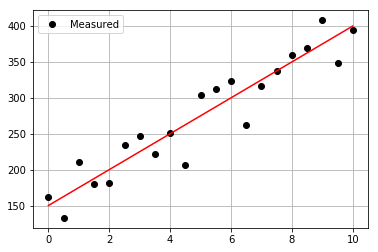

Parameters a0=150, a1=25 yield RSS=14444.48


In [40]:
# Complete function to load data, build model, compute RSS, and plot
def compute_rss_and_plot_fit(a0, a1):
    xd, yd = load_data()
    ym = model(xd, a0, a1)
    residuals = ym - yd
    rss = np.sum(np.square(yd-ym))
    summary = "Parameters a0={}, a1={} yield RSS={:0.2f}".format(a0, a1, rss)
    fig = plot_data_with_model(xd, yd, ym)
    return rss, summary

# Chose model parameter values and pass them into RSS function
rss, summary = compute_rss_and_plot_fit(a0=150, a1=25)
print(summary)

As stated earlier, the significance of RSS is in context of other values. More specifically, the minimum RSS is of value in identifying the specific set of parameter values for our model which yield the smallest residuals in an overall sense

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing the RSS Minima</h1><div class=""><p><p>In this exercise you will compute and visualize how RSS varies for different values of model parameters. Start by holding the intercept constant, but vary the slope: and for each slope value, you'll compute the model values, and the resulting RSS. Once you have an array of RSS values, you will determine minimal RSS value, in code, and from that minimum, determine the slope that resulted in that minimal RSS. </p>
<p>Use pre-loaded data arrays <code>x_data</code>, <code>y_data</code>, and empty container <code>rss_list</code> to get started. 
<img src="https://assets.datacamp.com/production/repositories/1480/datasets/f37d23c6c7997ef1daaa74b95cf3292fee6c324a/ch02_ex08_fig01.png" alt=""></p></div></div>

In [41]:
def compute_rss(y_data, y_model):
    rss = np.sum(np.square(y_data - y_model))
    return rss
rss_list = []

In [42]:
def plot_rss_vs_a1(a1_array, rss_array):
    fig, axis = plt.subplots()
    axis.plot(a1_array, rss_array, "b o", markersize=3)
    axis.plot(a1_array[np.argmin(rss_array)], rss_array[np.argmin(rss_array)], "r o", markersize=10 )
    return fig

The minimum RSS = 14411.193018382088, came from a1 = [24.8]


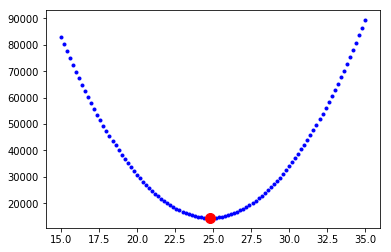

In [43]:
# Loop over all trial values in a1_array, computing rss for each
a1_array = np.linspace(15, 35, 101)
for a1_trial in a1_array:
    y_model = model(x_data, a0=150, a1=a1_trial)
    rss_value = compute_rss(y_data, y_model)
    rss_list.append(rss_value)
    
# Find the minimum RSS and the a1 value from whence it came
rss_array = np.array(rss_list)
best_rss = np.min(rss_array) 
best_a1 = a1_array[np.where(rss_array==best_rss)]
print('The minimum RSS = {}, came from a1 = {}'.format(best_rss, best_a1))

# Plot your rss and a1 values to confirm answer
fig = plot_rss_vs_a1(a1_array, rss_array)

<p class="">Correct! The best slope is the one out of an array of slopes than yielded the minimum RSS value out of an array of RSS values. Python tip: notice that we started with <code>rss_list</code> to make it easy to <code>.append()</code> but then later converted to <code>numpy.array()</code> to gain access to all the numpy methods.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Least-Squares with 'numpy'</h1><div class=""><p>The formulae below are the result of working through the calculus discussed in the introduction. In this exercise, we'll trust that the calculus correct, and implement these formulae in code using <code>numpy</code>.</p>
    $$a_{1} = \frac{covariance(x, y) }{ variance(x)}$$<p>
    $$a_{0} = mean(y) - a_{1} mean(x)$$ 
    
    


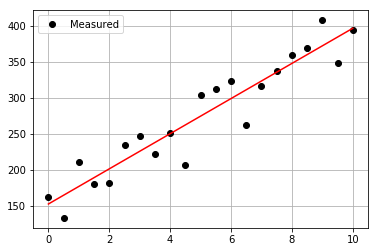

Parameters a0=152.12363846359307, a1=24.47322678251948 yield RSS=14385.60


In [44]:
# prepare the means and deviations of the two variables
x_mean = np.sum(x)/len(x)
y_mean = np.sum(y)/len(y)
x_dev = x - x_mean
y_dev = y - y_mean

# Complete least-squares formulae to find the optimal a0, a1
a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
a0 = y_mean - (a1 * x_mean)

# Use the those optimal model parameters a0, a1 to build a model
y_model = model(x, a0, a1)

# plot to verify that the resulting y_model best fits the data y
fig, rss = compute_rss_and_plot_fit(a0, a1)
print(rss)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Optimization with Scipy</h1><div class=""><p><p>It is possible to write a <code>numpy</code> implementation of the <strong>analytic</strong> solution to find the minimal RSS value. But for more complex models, finding analytic formulae is not possible, and so we turn to other methods. </p>
<p>In this exercise you will use <code>scipy.optimize</code> to employ a more general approach to solve the same optimization problem. </p>
<p>In so doing, you will see additional return values from the method that tell answer us "how good is best". Here we will use the same measured data and parameters as seen in the last exercise for ease of comparison of the new <code>scipy</code> approach.</p></div></div>

In [45]:
from scipy import optimize

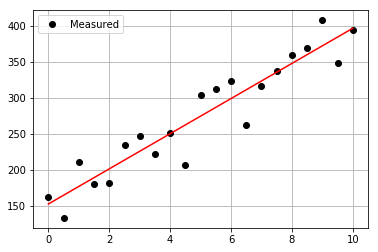

In [46]:
# Define a model function needed as input to scipy
def model_func(x, a0, a1):
    return a0 + (a1*x)

# Load the measured data you want to model
x_data, y_data  = load_data()

# call curve_fit, passing in the model function and data; then unpack the results
param_opt, param_cov = optimize.curve_fit(model_func, x_data, y_data)
a0 = param_opt[0]  # a0 is the intercept in y = a0 + a1*x
a1 = param_opt[1]  # a1 is the slope     in y = a0 + a1*x

# test that these parameters result in a model that fits the data
fig, rss = compute_rss_and_plot_fit(a0, a1)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Least-Squares with `statsmodels`</h1><div class=""><p><p>Several python libraries provide convenient abstracted interfaces so that you need not always be so explicit in handling the machinery of optimization of the model. </p>
<p>As an example, in this exercise, you will use the <code>statsmodels</code> library in a more high-level, generalized work-flow for building a model using least-squares optimization (minimization of RSS).</p>
<p>To help get you started, we've pre-loaded the data from <code>x_data, y_data = load_data()</code> and stored it in a pandas DataFrame with column names <code>x_column</code> and <code>y_column</code> using <code>df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))</code></p></div></div>

In [47]:
x_data, y_data = load_data()
df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))

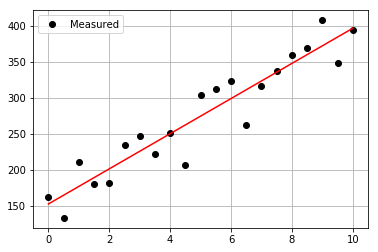

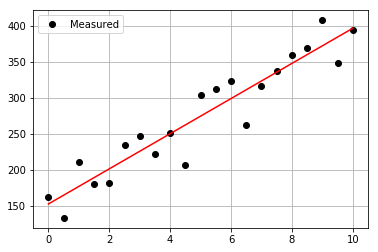

In [48]:
# Pass data and `formula` into ols(), use and `.fit()` the model to the data
model_fit = ols(formula="y_column ~ x_column", data=df).fit()

# Use .predict(df) to get y_model values, then over-plot y_data with y_model
y_model = model_fit.predict(df)
fig = plot_data_with_model(x_data, y_data, y_model)

# Extract the a0, a1 values from model_fit.params
a0 = model_fit.params['Intercept']
a1 = model_fit.params['x_column']

# Visually verify that these parameters a0, a1 give the minimum RSS
fig, rss = compute_rss_and_plot_fit(a0, a1)

# <font color=red>03 - Making Model Predictions </font> 
 Next we will apply models to real data and make predictions. We will explore some of the most common pit-falls and limitations of predictions, and we evaluate and compare models by quantifying and contrasting several measures of goodness-of-fit, including RMSE and R-squared. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear Model in Anthropology</h1><div class=""><p><p>If you found part of a skeleton, from an adult human that lived thousands of years ago, how could you estimate the height of the person that it came from? This exercise is in part inspired by the work of forensic anthropologist Mildred Trotter, who built a regression model for the calculation of stature estimates from human "long bones" or femurs that is commonly used today.</p>
<p>In this exercise, you'll use data from many living people, and the python library <code>scikit-learn</code>, to build a linear model relating the length of the femur (thigh bone) to the "stature" (overall height) of the person. Then, you'll apply your model to make a prediction about the height of your ancient ancestor.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/24c5103a89f299f1518d5ca969a56211fca37857/ch02_ex14_fig01.png" alt=""></p></div></div>

In [49]:
df = pd.read_csv('./data/femur_data.csv')
legs = df.length.values
heights = df.height.values

# import the sklearn class LinearRegression and initialize the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Prepare the measured data arrays and fit the model to them
legs = legs.reshape(len(legs),1)
heights = heights.reshape(len(heights),1)
model.fit(legs, heights)

# Use the fitted model to make a prediction for the found femur
fossil_leg = np.array([50.7])
fossil_leg = fossil_leg.reshape(len(fossil_leg),1)

fossil_height = model.predict(fossil_leg)
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0,0]))

Predicted fossil height = 182.44 cm


<div class="dc-completed__message"><p class="">Correct! Notice that we used the pre-loaded data to fit or "train" the model, and then applied that model to make a prediction about newly collected data that was not part of the data used to fit the model. Also notice that <code>model.predict()</code> returns the answer as an array of <code>shape</code> = <code>(1,1)</code>, so we had to index into it with the <code>[0,0]</code> syntax when printing. This is an artifact of our overly simplified use of <code>sklearn</code> here: the details of this are beyond the scope of the current course, but relate to the number of samples and features that one might use in a more sophisticated, generalized model.</p></div>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear Model in Oceanography</h1><div class=""><p><p>Time-series data provides a context in which the "slope" of the linear model represents a "rate-of-change". </p>
<p>In this exercise, you will use measurements of sea level change from 1970 to 2010, build a linear model of that changing sea level and use it to make a prediction about the future sea level rise.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/f225423a51edaca69ffe8383a8994063c3eb098b/ch02_ex15_fig01.png" alt=""></p></div></div>

In [50]:
df = pd.read_csv('./data/sea_level_data.csv', skiprows=6)
df.head()
years = df.year.values.reshape(len(df.year.values),1)
levels = df.sea_level_inches.values.reshape(len(df.sea_level_inches.values),1)

In [51]:
def plot_data_and_forecast(xd, yd, xm, ym):
    fig, axis = plt.subplots()
    axis.plot(xd, yd, linestyle=" ", marker="o", color="black", label="Data")
    axis.plot(xm, ym, linestyle="-", marker=None, color="red", label="Forecast")
    axis.grid(True)
    axis.legend(loc="best")
    return fig

Prediction: year = [[2100]], level = 16.66


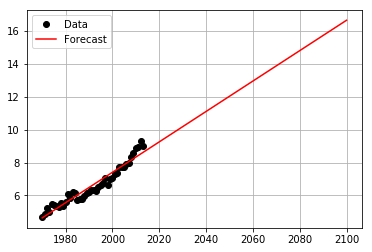

In [52]:
# Import LinearRegression class, build a model, fit to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(years, levels)

# Use model to make a prediction for one year, 2100
future_year = [[2100]]
future_level = model.predict(future_year)
print("Prediction: year = {}, level = {:.02f}".format(future_year, future_level[0,0]))

# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)
fig = plot_data_and_forecast(years, levels, years_forecast, levels_forecast)

<div class="dc-completed__message"><p class="">Correct! Note that with <code>scikit-learn</code>, although we could extract <code>a0 = model.intercept_[0]</code> and <code>a1 = model.coef_[0,0]</code>, we do not need to do that in order to make predictions, we just call <code>model.predict()</code>. With more complex models, these parameters may not have easy physical interpretations. 

Notice also that although our model is linear, the actual data appears to have an up-turn that might be better modeled by adding a quadratic or even exponential term to our model. The  linear model forecast may be underestimating the rate of increase in sea level.</p></div>

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear Model in Cosmology</h1><div class=""><p><p>Less than 100 years ago, the universe appeared to be composed of a single static galaxy, containing perhaps a million stars. Today we have observations of hundreds of billions of galaxies, each with hundreds of billions of stars, all moving.</p>
<p>The beginnings of the modern physical science of cosmology came with the <a href="http://www.pnas.org/content/15/3/168" target="_blank" rel="noopener noreferrer">publication in 1929 by Edwin Hubble</a> that included use of a linear model.</p>
<p>In this exercise, you will build a model whose slope will give Hubble's Constant, which describes the velocity of galaxies as a linear function of distance from Earth.</p>
<p><img src="http://www.pnas.org/content/15/3/168/F2.medium.gif" alt="Hubble's Plot"></p></div></div></div>

In [53]:
df = pd.read_csv('./data/hubble_data.csv', skiprows=8)
#ears = df.year.values.reshape(len(df.year.values),1)
#levels = df.sea_level_inches.values.reshape(len(df.sea_level_inches.values),1)

In [54]:
# Fit the model, based on the form of the formula
model_fit = ols(formula="velocities ~ distances", data=df).fit()

# Extract the model parameters and associated "errors" or uncertainties
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

# Print the results
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44


<p class="">Correct! Later in the course, we will spend more time with model uncertainty, and exploring how to compute it ourselves. Notice the <code>~</code> in the <code>formula</code> means "similar to" and is interpreted by <code>statsmodels</code> to mean that <code>y ~ x</code> have a linear relationship. More recently, observed astrophysical data extend the veritical scale of measured data out further by almost a factor of 50. Using this new data to model gives a very different value for the slope, Hubble's Constant, of about 72. Modeling with new data revealed a different slope, and this has big implications in the physics of the Universe.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Interpolation: Inbetween Times</h1><div class=""><p><p>In this exercise, you will build a linear model by fitting monthly time-series data for the Dow Jones Industrial Average (DJIA) and then use that model to make predictions for daily data (in effect, an interpolation). Then you will compare that daily prediction to the real daily DJIA data.</p>
<p>A few notes on the data. "OHLC" stands for "Open-High-Low-Close", which is usually daily data, for example the opening and closing prices, and the highest and lowest prices, for a stock in a given day. "DayCount" is an integer number of days from start of the data collection. </p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/14df216faa874a9ea14c50bd3ca3dae800468add/ch03_ex06_fig01.png" alt=""></p></div></div>

In [55]:
df_monthly = pd.read_csv('./data/df_monthly.csv', index_col=0 )
df_daily = pd.read_csv('./data/df_daily.csv', index_col=0)
df_monthly.index= pd.to_datetime(df_monthly.index)
df_daily.index= pd.to_datetime(df_daily.index)

In [56]:
def plot_model_with_data(df):
    fig, axis = plt.subplots()
    axis.plot(df.index, df.Close, linestyle=" ", marker="o", color="black", label="Data")
    axis.plot(df.index, df.Model, linestyle="-", marker=None, color="red", label="Forecast")
    axis.grid(True)
    axis.legend(loc="best")
    plt.xticks(rotation=45)
    plt.title('RSS = {:.2f}'.format(compute_rss(df.Close, df.Model)))
    return fig

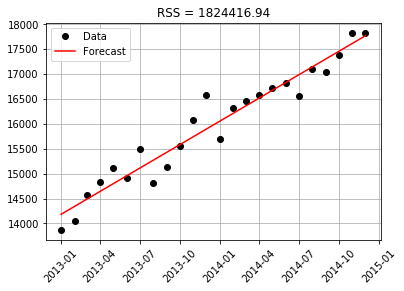

In [57]:
# build and fit a model to the df_monthly data
model_fit = ols('Close ~ DayCount', data=df_monthly).fit()

# Use the model FIT to the MONTHLY data to make a predictions for both monthly and daily data
df_monthly['Model'] = model_fit.predict(df_monthly.DayCount)
df_daily['Model'] = model_fit.predict(df_daily.DayCount)

# Plot the monthly and daily data and model, compare the RSS values seen on the figures
fig_monthly = plot_model_with_data(df_monthly)

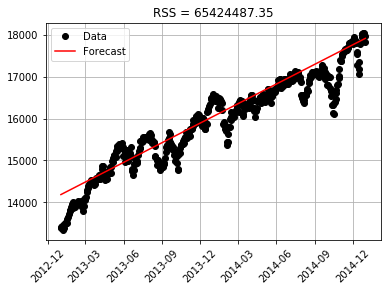

In [58]:
fig_monthly = plot_model_with_data(df_daily)

Correct! Notice the monthly data looked linear, but the daily data clearly has additional, nonlinear trends. Under-sampled data often misses real-world features in the data on smaller time or spatial scales. Using the model from the under-sampled data to make interpolations to the daily data can result is large residuals. Notice that the RSS value for the daily plot is more than 30 times worse than the monthly plot

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Extrapolation: Going Over the Edge</h1><div class=""><p><p>In this exercise, we consider the perils of extrapolation. Shown here is the profile of a hiking trail on a mountain. One portion of the trail, marked in black, looks linear, and was used to build a model. But we see that the best fit line, shown in red, does not fit outside the original "domain", as it extends into this new outside data, marked in blue. </p>
<p>If we want use the model to make predictions for the altitude, but still be accurate to within some tolerance, what are the smallest and largest values of independent variable <code>x</code> that we can allow ourselves to apply the model to?"</p>
<p>Here, use the preloaded <code>x_data</code>, <code>y_data</code>, <code>y_model</code>, and <code>plot_data_model_tolerance()</code> to complete your solution.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/6307576adc9dde93c10422e742c33d865f9fbc72/ch03_ex07_fig01.png" alt=""></p></div></div>

In [59]:
# Compute the residuals, "data - model", and determine where [residuals < tolerance]
#residuals = np.abs(y_data- y_model)
tolerance = 100
#x_good = x_data[residuals < tolerance]

# Find the min and max of the "good" values, and plot y_data, y_model, and the tolerance range
#print('Minimum good x value = {}'.format(np.max(x_good)))
#print('Maximum good x value = {}'.format(np.min(x_good)))
#fig = plot_data_model_tolerance(x_data, y_data, y_model, tolerance)

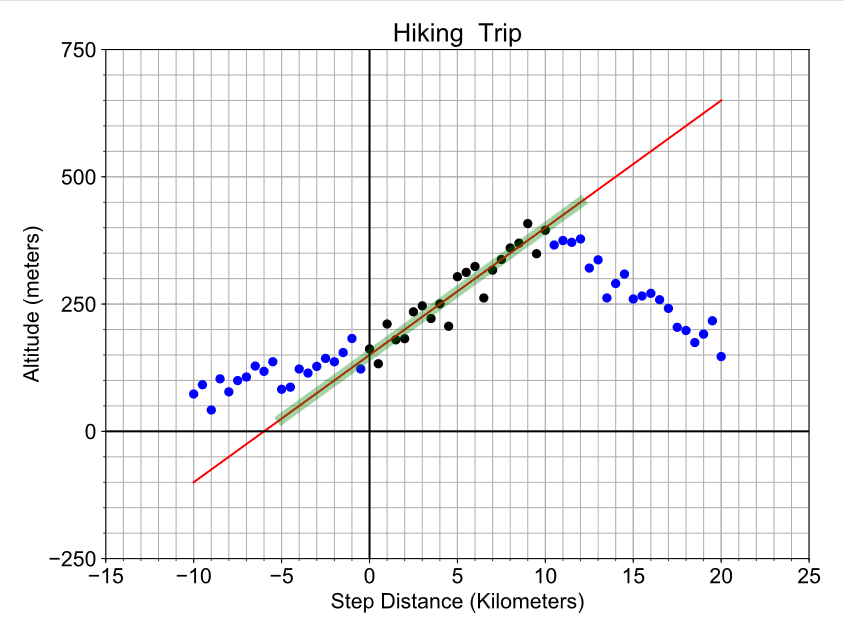
Correct! Notice the range of good values, which extends a little out into the new data, is marked in green on the plot. By comparing the residuals to a tolerance threshold, we can quantify how far out out extrapolation can go before the difference between model and data gets too large.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">RMSE Step-by-step</h1><div class=""><p><p>In this exercise, you will quantify the over-all model "goodness-of-fit" of a pre-built model, by computing one of the most common quantitative measures of model quality, the RMSE, step-by-step.</p>
<p>Start with the pre-loaded data <code>x_data</code> and <code>y_data</code>, and use it with a predefined modeling function <code>model_fit_and_predict()</code>.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/d30dad2a3e5c1af4cfd0b123cfa7da69749d30b0/ch03_ex10_fig01.png" alt=""></p></div></div>

In [60]:
x_data = np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. , 4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5, 9. ,   9.5,  10. ])
y_data = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 , 181.98528167,  234.67907351,  246.48971034,  221.58691239, 250.3924093 ,  206.43287615,  303.75089312,  312.29865056, 323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912, 360.13633529,  369.72729852,  408.0289548 ,  348.82736117, 394.93384188])

In [61]:
def model_fit_and_predict(x_data, y_data):
    model = LinearRegression()
    model.fit(x_data.reshape(-1,1), y_data)
    y_model = model.predict(x_data.reshape(-1,1))
    return y_model

In [62]:
# Build the model and compute the residuals "model - data"
y_model = model_fit_and_predict(x_data, y_data)
residuals = y_model - y_data

# Compute the RSS, MSE, and RMSE and print the results
RSS = np.sum(np.square(residuals))
MSE = RSS/len(residuals)
RMSE = np.sqrt(MSE)
print('RMSE = {:0.2f}, MSE = {:0.2f}, RSS = {:0.2f}'.format(RMSE, MSE, RSS))

RMSE = 26.17, MSE = 685.03, RSS = 14385.60


<p class="">Correct! Notice that instead of computing <code>RSS</code> and normalizing with division by <code>len(residuals)</code> to get the MSE, you could have just applied <code>np.mean(np.square())</code> to the <code>residuals</code>. Another useful point to help you remember; you can think of the MSE like a variance, but instead of differencing the data from its mean, you difference the data and the model. Similarly, think of RMSE as a standard deviation.</p>

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">R-Squared</h1><div class=""><p><p>In this exercise you'll compute another measure of goodness, <strong>R-squared</strong>. R-squared is the ratio of the variance of the residuals divided by the variance of the data we are modeling, and in so doing, is a measure of how much of the variance in your data is "explained" by your model, as expressed in the spread of the residuals.</p>
<p>Here we have pre-loaded the data <code>x_data</code>,<code>y_data</code> and the model predictions <code>y_model</code> for the best fit model; you're goal is to compute the R-squared measure to quantify how much this linear model accounts for variation in the data.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/d30dad2a3e5c1af4cfd0b123cfa7da69749d30b0/ch03_ex10_fig01.png" alt=""></p></div></div></div>

In [63]:
# Compute the residuals and the deviations
residuals = y_model - y_data
deviations = np.mean(y_data) - y_data

# Compute the variance of the residuals and deviations
var_residuals = np.mean(np.square(residuals))
var_deviations = np.mean(np.square(deviations))

# Compute r_squared as 1 - the ratio of RSS/Variance
r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))

R-squared is 0.89


Correct! Notice that R-squared varies from 0 to 1, where a value of 1 means that the model and the data are perfectly correlated and all variation in the data is predicted by the model. A value of zero would mean none of the variation in the data is predicted by the model. Here, the data points are close to the line, so R-squared is closer to 1.0

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Variation Around the Trend</h1><div class=""><p><p>The data need not be perfectly linear, and there may be some random variation or "spread" in the measurements, and that does translate into variation of the model parameters. This variation is in the parameter is quantified by "standard error", and interpreted as "uncertainty" in the estimate of the model parameter.</p>
<p>In this exercise, you will use <code>ols</code> from <code>statsmodels</code> to build a model and extract the standard error for each parameter of that model.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/96008939a1bd6ca848acb59b2cc4d45fea356fc7/ch03_ex13_fig01.png" alt=""></p></div></div>

In [64]:
# Store x_data and y_data, as times and distances, in df, and use ols() to fit a model to it.
df = pd.DataFrame(dict(times=x_data, distances=y_data))
model_fit = ols(formula="distances ~ times", data=df).fit()

# Extact the model parameters and their uncertainties
a0 = model_fit.params['Intercept']
e0 = model_fit.bse['Intercept']
a1 = model_fit.params['times']
e1 = model_fit.bse['times']

# Print the results with more meaningful names
print('Estimate    of the intercept = {:0.2f}'.format(a0))
print('Uncertainty of the intercept = {:0.2f}'.format(e0))
print('Estimate    of the slope = {:0.2f}'.format(a1))
print('Uncertainty of the slope = {:0.2f}'.format(e1))

Estimate    of the intercept = 152.12
Uncertainty of the intercept = 11.59
Estimate    of the slope = 24.47
Uncertainty of the slope = 1.98


Correct! The size of the parameters standard error only makes sense in comparison to the parameter value itself. In fact the units are the same! So a1 and e1 both have units of velocity (meters/second), and a0 and e0 both have units of distance (meters).

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Variation in Two Parts</h1><div class=""><p><p>Given two data sets of distance-versus-time data, one with very small velocity and one with large velocity. Notice that both may have the same standard error of slope, but different R-squared for the model overall, depending on the size of the slope ("effect size") as compared to the standard error ("uncertainty"). </p>
<p>If we plot both data sets as scatter plots on the same axes, the contrast is clear. Variation due to the slope is different than variantion due to the random scatter about the trend line. In this exercise, your goal is to compute the standard error and R-squared for two data sets and compare.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/2995eaec3d7e58c0dd64cad4c1f5ec3f30873e49/ch03_ex14_fig01.png" alt=""></p></div></div>

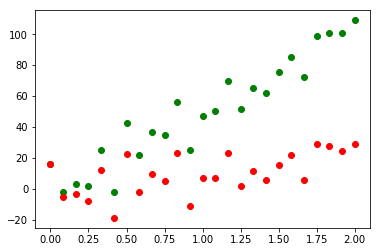

In [65]:
df = pd.read_csv('./data/two_distances.csv')
plt.plot(df.times, df.distances1, "g o")
plt.plot(df.times, df.distances2, "r o")
plt.show()

In [66]:
# Build and fit two models, for columns distances1 and distances2 in df
model_1 = ols(formula="distances1 ~ times", data=df).fit()
model_2 = ols(formula="distances2 ~ times", data=df).fit()

# Extract R-squared for each model, and the standard error for each slope
se_1 = model_1.bse['times']
se_2 = model_2.bse['times']
rsquared_1 = model_1.rsquared
rsquared_2 = model_2.rsquared

# Print the results
print('Model 1: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_1, rsquared_1))
print('Model 2: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_2, rsquared_2))

Model 1: SE = 3.694, R-squared = 0.898
Model 2: SE = 3.694, R-squared = 0.335


# <font color=red>04 - Estimating Model Parameters </font> 
 In our final chapter, we introduce concepts from inferential statistics, and use them to explore how maximum likelihood estimation and bootstrap resampling can be used to estimate linear model parameters. We then apply these methods to make probabilistic statements about our confidence in the model parameters. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Sample Statistics versus Population</h1><div class=""><p><p>In this exercise you will work with a preloaded <code>population</code>. You will construct a <code>sample</code> by drawing points at random from the population. You will compute the mean standard deviation of the sample taken from that population to test whether the sample is representative of the population. Your goal is to see where the sample statistics are the same or very close to the population statistics.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/8f7dbbdc87c06bd5cdd3142de24ecbfff811b426/ch04_ex01_fig01.png" alt=""></p></div></div>

In [67]:
population = np.array([ 104.96714153, 98.61735699, 106.47688538, 115.23029856, 97.65846625, 97.65863043, 115.79212816, 107.67434729, 95.30525614, 105.42560044, 95.36582307, 95.34270246, 102.41962272, 80.86719755, 82.75082167, 94.37712471, 89.8716888 , 103.14247333, 90.91975924, 85.87696299, 114.65648769, 97.742237 , 100.67528205, 85.75251814, 94.55617275, 101.1092259 , 88.49006423, 103.75698018, 93.9936131 , 97.0830625 , 93.98293388, 118.52278185, 99.86502775, 89.42289071, 108.22544912, 87.7915635 , 102.08863595, 80.40329876, 86.71813951, 101.96861236, 107.3846658 , 101.71368281, 98.84351718, 96.98896304, 85.2147801 , 92.80155792, 95.39361229, 110.57122226, 103.4361829 , 82.36959845, 103.24083969, 96.1491772 , 93.23078 , 106.11676289, 110.30999522, 109.31280119, 91.60782477, 96.90787624, 103.31263431, 109.75545127, 95.20825762, 98.14341023, 88.93665026, 88.03793376, 108.12525822, 113.56240029, 99.27989878, 110.03532898, 103.61636025, 93.54880245, 103.61395606, 115.38036566, 99.64173961, 115.64643656, 73.80254896, 108.21902504, 100.87047068, 97.0099265 , 100.91760777, 80.12431085, 97.80328112, 103.57112572, 114.77894045, 94.81729782, 91.91506397, 94.98242956, 109.15402118, 103.2875111 , 94.70239796, 105.13267433, 100.97077549, 109.68644991, 92.97946906, 96.72337853, 96.07891847, 85.36485052, 102.96120277, 102.61055272, 100.05113457, 97.65412867, 85.84629258, 95.79354677, 96.57285483, 91.97722731, 98.38714288, 104.04050857, 118.86185901, 101.74577813, 102.57550391, 99.25554084, 80.81228785, 99.73486125, 100.6023021 , 124.63242112, 98.07639035, 103.01547342, 99.6528823 , 88.31321962, 111.42822815, 107.51933033, 107.91031947, 90.90612545, 114.02794311, 85.98148937, 105.86857094, 121.90455626, 90.09463675, 94.3370227 , 100.99651365, 94.96524346, 84.49336569, 100.68562975, 89.37696286, 104.73592431, 90.80575766, 115.49934405, 92.16746708, 96.77938484, 108.13517217, 87.69135684, 102.27459935, 113.07142754, 83.92516765, 101.84633859, 102.59882794, 107.81822872, 87.63049289, 86.79543387, 105.21941566, 102.96984673, 102.5049285 , 103.46448209, 93.19975278, 102.32253697, 102.93072473, 92.85648582, 118.65774511, 104.73832921, 88.08696503, 106.56553609, 90.2531833 , 107.87084604, 111.58595579, 91.79317682, 109.63376129, 104.12780927, 108.2206016 , 118.96792983, 97.54611884, 92.46263836, 91.1048557 , 91.84189715, 99.22898291, 103.41151975, 102.76690799, 108.27183249, 100.13001892, 114.53534077, 97.35343167, 127.20169167, 106.25667348, 91.42842444, 89.29107502, 104.82472415, 97.76537215, 107.14000494, 104.73237625, 99.27171087, 91.53206282, 84.85152775, 95.53485048, 108.56398794, 102.14093744, 87.54261221, 101.73180926, 103.8531738 , 91.16142564, 101.53725106, 100.58208718, 88.57029702, 103.5778736 , 105.60784526, 110.83051243, 110.53802052, 86.22330632, 90.6217496 , 105.15035267, 105.13785951, 105.15047686, 138.52731491, 105.70890511, 111.3556564 , 109.54001763, 106.51391251, 96.84730755, 107.5896922 , 92.27174785, 97.63181393, 95.14636452, 100.81874139, 123.14658567, 81.32734807, 106.8626019 , 83.87284129, 95.28068134, 110.88950597, 100.64280019, 89.22255222, 92.84696291, 106.79597749, 92.69633368, 102.1645859 , 100.4557184 , 93.48399652, 121.43944089, 106.33919022, 79.74857413, 101.86454315, 93.38213535, 108.52433335, 92.07479262, 98.85263559, 105.04987279, 108.65755194, 87.99703593, 96.65498764, 95.25054689, 93.46670767, 117.6545424 , 104.04981711, 87.39116046, 109.17861947, 121.22156197, 110.32465261, 84.80630034, 95.15765927, 112.66911149, 92.92330534, 104.43819428, 107.74634053, 90.73069528, 99.40474644, 67.5873266 , 89.75612359, 97.47431849, 87.52216818, 116.32411304, 85.69858622, 95.59955513, 101.30740577, 114.41273289, 85.64137849, 111.63163752, 100.10233061, 90.18491349, 104.62103474, 101.99059696, 93.99783123, 100.69802085, 96.14686403, 101.13517345, 106.62130675, 115.86016816, 87.62184501, 121.33033375, 80.479122 , 98.48214905, 105.88317206, 102.80991868, 93.7730048 , 97.9187775 , 95.06999065, 94.10635243, 108.49602097, 103.57015486, 93.07090405, 108.99599875, 103.07299521, 108.12862119, 106.29628842, 91.71004989, 94.3981896 , 107.47293605, 106.10370265, 99.79098406, 101.17327383, 112.77664896, 94.08428611, 105.47097381, 97.97807348])

In [68]:
# Compute the population statistics
print("Population mean {:.1f}, stdev {:.2f}".format( population.mean(), population.std() ))

# Set random seed for reproducibility
np.random.seed(42)

# Construct a sample by randomly sampling 31 points from the population
sample = np.random.choice(population, size=31)

# Compare sample statistics to the population statistics
print("    Sample mean {:.1f}, stdev {:.2f}".format( sample.mean(), sample.std() ))

Population mean 100.0, stdev 9.74
    Sample mean 102.1, stdev 9.34


<div class="dc-completed__message"><p class="">Correct! Notice that the sample statistics are similar to the population statistics, but not the identical. If you were to compute the <code>len()</code> of each array, it is very different, but the means are not that much different as you might expect.</p></div>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Variation in Sample Statistics</h1><div class=""><p><p>If we create one sample of <code>size=1000</code> by drawing that many points from a population. Then compute a sample statistic, such as the mean, a single value that summarizes the sample itself.</p>
<p>If you repeat that sampling process <code>num_samples=100</code> times, you get <code>100</code> samples. Computing the sample statistic, like the mean, for each of the different samples, will result in a distribution of values of the mean. The goal then is to compute the mean of the means and standard deviation of the means.</p>
<p>Here you will use the preloaded <code>population</code>, <code>num_samples</code>, and <code>num_pts</code>, and note that the <code>means</code> and <code>deviations</code> arrays have been initialized to zero to give you containers to use for the for loop.</p></div></div>

In [69]:
population = np.random.normal(100, 10, 100000)
num_samples, num_pts = 100, 1000

In [70]:
# Initialize two arrays of zeros to be used as containers
means = np.zeros(num_samples)
stdevs = np.zeros(num_samples)

# For each iteration, compute and store the sample mean and sample stdev
for ns in range(num_samples):
    sample = np.random.choice(population, num_pts)
    means[ns] = sample.mean()
    stdevs[ns] = sample.std()

# Compute and print the mean() and std() for the sample statistic distributions
print("Means:  center={:>6.2f}, spread={:>6.2f}".format(means.mean(), means.std()))
print("Stdevs: center={:>6.2f}, spread={:>6.2f}".format(stdevs.mean(), stdevs.std()))

Means:  center=100.02, spread=  0.31
Stdevs: center=  9.95, spread=  0.23


In [71]:
def get_sample_statistics(population, num_samples, num_pts) :
    means = np.zeros(num_samples)
    stdevs = np.zeros(num_samples)
    for ns in range(num_samples):
        sample = np.random.choice(population, num_pts)
        means[ns] = sample.mean()
        stdevs[ns] = sample.std()
    return means, stdevs

Correct! If we only took one sample, instead of 100, there could be only a single mean and the standard deviation of that single value is zero. But each sample is different because of the randomness of the draws. The mean of the means is our estimate for the population mean, the stdev of the means is our measure of the uncertainty in our estimate of the population mean. This is the same concept as the standard error of the slope seen in linear regression.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing Variation of a Statistic</h1><div class=""><p><p>Previously, you have computed the variation of sample statistics. Now you'll visualize that variation.</p>
<p>We'll start with a preloaded <code>population</code> and a predefined function <code>get_sample_statistics()</code> to draw the samples, and return the sample statistics arrays.</p>
<p>Here we will use a predefined <code>plot_hist()</code> function that wraps the <code>matplotlib</code> method <code>axis.hist()</code>, which both bins and plots the array passed in. In this way you can see how the sample statistics have a distribution of values, not just a single value.</p></div></div>

In [72]:
def plot_hist(data, bins, data_name, color):
    fig = plt.hist(data, bins=bins, color=color)
    plt.title("""Distribution of the Means
    center = {:.2f}, spread = {:.2f}
    """.format(np.mean(data),np.std(data)))
    plt.show()
    return fig

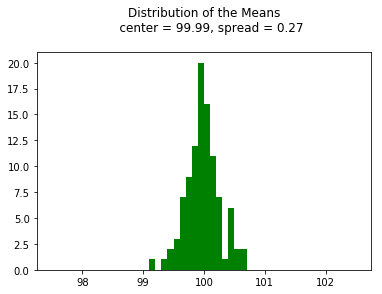

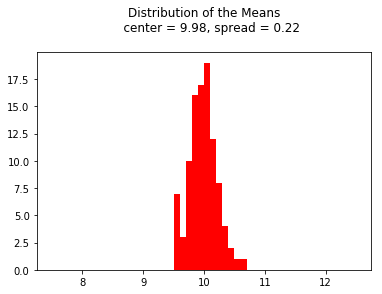

In [73]:
# Generate sample distribution and associated statistics
means, stdevs = get_sample_statistics(population, num_samples=100, num_pts=1000)

# Define the binning for the histograms
mean_bins = np.linspace(97.5, 102.5, 51)
std_bins = np.linspace(7.5, 12.5, 51)

# Plot the distribution of means, and the distribution of stdevs
fig = plot_hist(data=means, bins=mean_bins, data_name="Means", color='green')
fig = plot_hist(data=stdevs, bins=std_bins, data_name="Stdevs", color='red')

<p class="">Beautiful! Notice you have to page through the plots to see both. Can you see the center and spread in the title and the plots? If you have not before, compute those values using e.g. <code>means.mean()</code> and <code>means.std()</code> to see that they match the figure.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Estimation of Population Parameters</h1><div class=""><p><p>Imagine a constellation ("population") of satellites orbiting for a full year, and the distance traveled in each hour is measured in kilometers. There is variation in the distances measured from hour-to-hour, due to unknown complications of orbital dynamics. Assume we cannot measure all the data for the year, but we wish to build a population model for the variations in orbital distance per hour (speed) based on a sample of measurements.</p>
<p>In this exercise, you will assume that the population of hourly distances are best modeled by a gaussian, and further assume that the parameters of that population model can be estimated from the sample statistics. Start with the preloaded <code>sample_distances</code> that was taken from a population of cars.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/0e4170a7a9a66aa2c35b9878643d6c6545393f41/ch04_ex06_fig01.png" alt=""></p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/2737b392171c28443369515673254accef6f5b8e/ch04_ex06_fig02.png" alt=""></p></div></div>

In [74]:
sample_distances = np.random.normal(26918, 224, 1000)

In [75]:
# Define gaussian model function
def gaussian_model(x, mu, sigma):
    coeff_part = 1/(np.sqrt(2 * np.pi * sigma**2))
    exp_part = np.exp( - (x - mu)**2 / (2 * sigma**2) )
    return coeff_part*exp_part

In [76]:
def plot_data_and_model(sample_distances, population_model):
    plt.hist(sample_distances, density=True, bins=25)
    plt.plot(sample_distances, population_model, "r o", markersize=1)
    plt.show()
    return fig

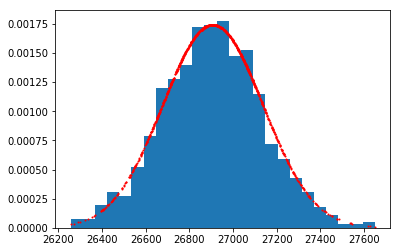

In [77]:
# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(sample_distances)
sample_stdev = np.std(sample_distances)

# Use the sample mean and stdev as estimates of the population model parameters mu and sigma
population_model = gaussian_model(sample_distances, mu=sample_mean, sigma=sample_stdev)


# Plot the model and data to see how they compare
fig = plot_data_and_model(sample_distances, population_model)

Beautiful! Notice in the plot that the data and the model do not line up exactly. This is to be expected because the sample is just a subset of the population, and any model built from it cannot be a prefect representation of the population. Also notice the vertical axis: it shows the normalize data bin counts, and the probability density of the model. Think of that as probability-per-bin, so that if summed all the bins, the total would be 1.0.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Maximizing Likelihood, Part 1</h1><div class=""><p><p>Previously, we chose the sample <code>mean</code> as an estimate of the population model paramter <code>mu</code>. But how do we know that the sample mean is the best estimator? This is tricky, so let's do it in two parts.</p>
<p>In Part 1, you will use a computational approach to compute the log-likelihood of a given estimate. Then, in Part 2, we will see that when you compute the log-likelihood for many possible guess values of the estimate, one guess will result in the maximum likelihood.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/6f2eb8ae464cc971134bd30debaabfaca662c5ec/ch04_ex07_fig01.png" alt=""></p></div></div>

In [78]:
# Compute sample mean and stdev, for use as model parameter value guesses
mu_guess = np.mean(sample_distances)
sigma_guess = np.std(sample_distances)

# For each sample distance, compute the probability modeled by the parameter guesses
probs = np.zeros(len(sample_distances))
for n, distance in enumerate(sample_distances):
    probs[n] = gaussian_model(distance, mu=mu_guess, sigma=sigma_guess)

# Compute and print the log-likelihood as the sum() of the log() of the probabilities
loglikelihood = np.sum(np.log(probs))
print('For guesses mu={:0.2f} and sigma={:0.2f}, the loglikelihood={:0.2f}'.format(mu_guess, sigma_guess, loglikelihood))

For guesses mu=26906.12 and sigma=228.97, the loglikelihood=-6852.54


Correct! Although the likelihood (the product of the probabilities) is easier to interpret, the loglikelihood has better numerical properties. Products of small and large numbers can cause numerical artifacts, but sum of the logs usually doesnt suffer those same artifacts, and the "sum(log(things))" is closely related to the "product(things)"

In [79]:
def compute_loglikelihood(sample_distances, mu, sigma):
    probs = np.zeros(len(sample_distances))
    for n, distance in enumerate(sample_distances):
        probs[n] = gaussian_model(distance, mu=mu, sigma=sigma_guess)
    loglikelihood = np.sum(np.log(probs))
    return loglikelihood    

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Maximizing Likelihood, Part 2</h1><div class=""><p><p>In Part 1, you computed a single log-likelihood for a single <code>mu</code>. In this Part 2, you will apply the predefined function <code>compute_loglikelihood()</code>, to compute an <strong><em>array</em></strong> of log-likelihood values, one for each element in an <strong><em>array</em></strong> of possible <code>mu</code> values.</p>
<p>The goal then is to determine which single <code>mu</code> guess leads to the single <strong><em>maximum</em></strong> value of the loglikelihood array.</p>
<p>To get started, use the preloaded data <code>sample_distances</code>, <code>sample_mean</code>, <code>sample_stdev</code> and a helper function <code>compute_loglikelihood()</code></p></div></div>

In [80]:
sample_mean = np.mean(sample_distances)
sample_stdev = np.std(sample_distances)

In [81]:
# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = sample_mean - 2*sample_stdev
high_guess = sample_mean + 2*sample_stdev
mu_guesses = np.linspace(low_guess, high_guess, 101)

In [82]:
def plot_loglikelihoods(mu_guesses, loglikelihoods):
    fig, axis = plt.subplots()
    axis.plot(mu_guesses, loglikelihoods, "b-o", markersize=0)
    axis.plot(mu_guesses[np.argmax(loglikelihoods)], loglikelihoods[np.argmax(loglikelihoods)], "r o", markersize=10 )
    plt.show()

Maximum loglikelihood found for best mu guess=[26906.12273272]


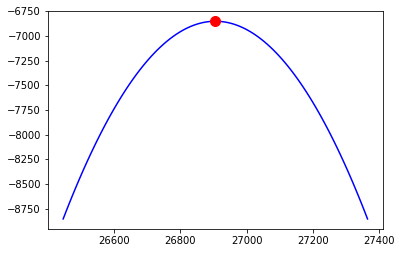

In [83]:
# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = sample_mean - 2*sample_stdev
high_guess = sample_mean + 2*sample_stdev
mu_guesses = np.linspace(low_guess, high_guess, 101)

# Compute the loglikelihood for each model created from each guess value
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    loglikelihoods[n] = compute_loglikelihood(sample_distances, mu=mu_guess, sigma=sample_stdev)

# Find the best guess by using logical indexing, the print and plot the result
best_mu = mu_guesses[loglikelihoods==np.max(loglikelihoods)]
print('Maximum loglikelihood found for best mu guess={}'.format(best_mu))
fig = plot_loglikelihoods(mu_guesses, loglikelihoods)

<p class="">Beautiful! Notice that the guess for mu that gave the maximum likelihood is precisely the same value as the <code>sample.mean()</code>. The <code>sample_mean</code> is thus said to be the "Maximum Likelihood Estimator" of the population mean <code>mu</code>. We call that value of <code>mu</code> the "Maximum Likelihood Estimator" of the population <code>mu</code> because, of all the <code>mu</code> values tested, it results in a model population with the greatest likelihood of producing the sample data we have.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Bootstrap and Standard Error</h1><div class=""><p><p>Imagine a National Park where park rangers hike each day as part of maintaining the park trails. They don't always take the same path, but they do record their final distance and time. We'd like to build a statistical model of the variations in daily distance traveled from a limited sample of data from one ranger.</p>
<p>Your goal is to use bootstrap resampling, computing one mean for each resample, to create a distribution of means, and then compute standard error as a way to quantify the "uncertainty" in the <em>sample statistic</em> as an estimator for the <em>population statistic</em>.</p>
<p>Use the preloaded <code>sample_data</code> array of 500 independent measurements of distance traveled. For now, we this is a simulated data set to simplify this lesson. Later, we'll see more realistic data.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/fa83248d06fafa59e094a363fecbecaa84902fe6/ch04_ex10_fig03.png" alt=""></p></div></div>

In [84]:
def plot_data_hist(x):
    plt.hist(x, density=True, bins=25)
    plt.title("""Resample Count = {}, 
    Mean={:0.1f}, Std Error = {:.2f}'.format(len(x),np.mean(x), np.std(x))
    """)
    plt.show()
    return fig

In [85]:
sample_data = np.random.normal(5, 3.5, 500)
resample_size = 500
num_resamples = 100
bootstrap_means = np.zeros(num_resamples)

Bootstrap Distribution: center=4.7, spread=0.1


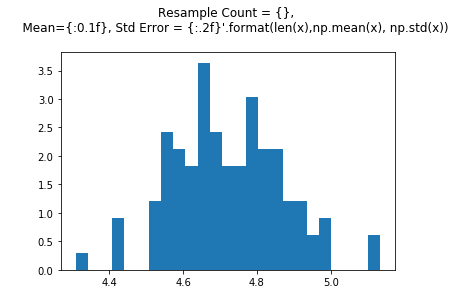

In [86]:
# Use the sample_data as a model for the population
population_model = sample_data

# Resample the population_model 100 times, computing the mean each sample
for nr in range(num_resamples):
    bootstrap_sample = np.random.choice(population_model, size=resample_size, replace=True)
    bootstrap_means[nr] = np.mean(bootstrap_sample)

# Compute and print the mean, stdev of the resample distribution of means
distribution_mean = np.mean(bootstrap_means)
standard_error = np.std(bootstrap_means)
print('Bootstrap Distribution: center={:0.1f}, spread={:0.1f}'.format(distribution_mean, standard_error))

# Plot the bootstrap resample distribution of means
fig = plot_data_hist(bootstrap_means)

<p class="">Well done! Notice that <code>standard_error</code> is just one measure of spread of the distribution of bootstrap resample means. You could have computed the <code>confidence_interval</code> using <code>np.percentile(bootstrap_means, 0.95)</code> and <code>np.percentile(bootstrap_means, 0.05)</code> to find the range distance values containing the inner 90% of the distribution of means.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Estimating Speed and Confidence</h1><div class=""><p><p>Let's continue looking at the National Park hiking data. Notice that some distances are negative because they walked in the opposite direction from the trail head; the data are messy so let's just focus on the overall trend.</p>
<p>In this exercise, you goal is to use boot-strap resampling to find the distribution of speed values for a linear model, and then from that distribution, compute the best estimate for the speed and the 90th percent confidence interval of that estimate. The speed here is the slope parameter from the linear regression model to fit distance as a function of time.</p>
<p>To get you started, we've preloaded <code>distance</code> and <code>time</code> data, together with a pre-defined <code>least_squares()</code> function to compute the speed value for each resample.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/e62f81f8ffcc7daae7a1ceffd43ba2d0c79738b8/ch04_ex10_fig01.png" alt=""></p></div></div>

In [87]:
distances = np.array([0.9934283060224653, -0.2565286023423693, 1.335377076201385, 3.1060597128160508, -0.38830674944667193, -0.36827391389836106, 3.278425631014783, 1.6748694583058175, -0.7789487718699042, 1.2651200871719293, -0.7268353856249246, -0.7114595071405138, 0.7239245431320682, -3.566560489315596, -3.1698356650260653, -0.8245750584819453, -1.7056622406688475, 0.9684946651905477, -1.4560481510424217, -2.444607402670583, 3.331297537843108, -0.03155260097307133, 0.5750564093758477, -2.3894963724269136, -0.6087654490503653, 0.7218451794197321, -1.7819871548446056, 1.291396036691344, -0.6412773798376099, -0.0033874995865535995, -0.6034132244587939, 4.324556369017875, 0.6130055505241322, -1.4554218579118006, 2.325089824206378, -1.7416872999420443, 1.1377271900095107, -3.1793402477595514, -1.896372097796861, 1.173722471738247, 2.276933159990821, 1.162736562379941, 0.6087034352235189, 0.2577926088214224, -2.077043980734855, -0.5396884167894173, -0.0012775419195749649, 3.0542444524378314, 1.6472365791369228, -2.546080310725468, 1.64816793878959, 0.24983543916736695, -0.3138440006119174, 2.283352577681736, 3.141999044991902, 2.9625602382323972, -0.558435046445277, 0.521575248297571, 1.8225268628071278, 3.131090254244718, 0.24165152430942005, 0.8486820466723657, -0.9726699480120564, -1.1324132481613416, 2.9050516447883963, 4.012480057141646, 1.1759797568393324, 3.347065795784048, 2.0832720500952684, 0.08976049078975157, 2.122791211016828, 4.496073132931938, 1.368347921780097, 4.589287311628013, -3.7594902081794888, 3.143805008750448, 1.6940941364763424, 0.9419852990682652, 1.7435215530710046, -2.3951378292017855, 1.1606562243249763, 2.334225143023493, 4.595788089483032, 0.6234595634527054, 0.06301279421362471, 0.6964859128309269, 3.550804235404148, 2.397502219319369, 0.7004795924659224, 2.806534866226712, 1.9941550986960808, 3.7572899810657785, 0.43589381224529533, 1.2046757068044638, 1.0957836937356848, -1.027029896264237, 2.512240554129152, 2.4621105443597786, 1.9702269132849217, 1.5108257332497061, -0.8307414841008285, 1.178709354469282, 1.354570966946461, 0.45544546155676224, 1.7574285766679818, 2.908101713629077, 5.89237180242106, 2.489155625663678, 2.6751007814455288, 2.0311081684676657, -1.6375424305980828, 2.1669722491015664, 2.360460419882053, 7.186484224970572, 1.8952780704377552, 2.9030946846672254, 2.2505764605895133, 0.0026439247609357786, 4.6456456290300405, 3.883866065373548, 3.9820638940860937, 0.6012250904105221, 5.245588621872198, -0.3437021255845618, 3.6537141876005403, 6.880911251619957, 0.5389273497386233, 1.4074045407944562, 2.7593027301752824, 1.5730486917676016, -0.5013268621322653, 2.7571259496120546, 0.5153925725477904, 3.607184861270363, 0.8411515315323939, 5.799868810035079, 1.153493415327526, 2.095876967588649, 4.3870344347393395, 0.3182713671320898, 3.2549198692082593, 5.434285508564856, -0.37496646912245524, 3.2292677170646082, 3.399765588496847, 4.46364574355462, 0.44609857824383603, 0.29908677383144733, 4.0038831312337955, 3.573969346466372, 3.500985700691753, 3.7128964189939513, 1.6799505568430184, 3.5245073943220073, 3.6661449465973623, 1.6712971639472645, 6.851549022289513, 4.087665841823576, 0.7773930055947029, 4.49310721726766, 1.2506366595453573, 4.794169207484904, 5.557191158014808, 1.6186353632965793, 5.206752258488644, 4.125561853872997, 4.9641203199889805, 7.133585965307894, 2.8692237679942587, 1.8725276712850207, 1.6209711407489533, 1.7883794300691234, 3.2857965811717915, 4.142303949633288, 4.033381598660038, 5.154366498072047, 3.5460037837558143, 6.447068154314634, 3.0306863335240877, 9.020338333179238, 4.851334695530013, 1.905684887167435, 1.4982150038777755, 4.6249448304863705, 3.2330744293482985, 5.128000988184184, 4.66647524914709, 3.5943421746862545, 2.0664125638631905, 0.750305550628271, 2.906970095865958, 5.532797588646945, 4.268187488260407, 1.3685224425760238, 4.226361851702364, 4.670634759457673, 2.152285127597734, 4.2474502118910555, 4.076417436892, 1.6940594043387538, 4.715574720696567, 5.141569052736469, 6.206102486350554, 6.167604104069806, 1.324661264085818, 2.224349920169754, 5.15007053441732, 5.1675719018244175, 5.190095372612096, 11.885462981309441, 5.341781021386334, 6.491131280361198, 6.148003526986405, 5.562782502611595, 3.649461510719309, 5.817938440986534, 2.7743495709248567, 3.866362786519982, 3.3892729043417935, 4.543748278772645, 9.029317133347018, 0.6854696148165038, 5.812520380749027, 1.2345682576206967, 3.5361362684211333, 6.677901193934732, 4.648560038190926, 2.384510444141388, 3.1293925814800643, 5.939195497869352, 3.139266736565727, 5.05291717916395, 4.731143679807627, 3.3567993047883657, 8.96788817865065, 5.967838044636022, 0.6697148266847854, 5.112908629538856, 3.436427070463224, 6.484866669592448, 3.2149585231345985, 4.590527117066202, 5.849974557960914, 6.591510388340243, 2.4794071858884474, 4.230997528318103, 3.970109377678088, 3.6333415348525766, 8.490908480562194, 5.789963421921912, 2.4782320913299096, 6.855723894109553, 9.284312394025267, 7.124930521102295, 2.0412600680919732, 4.1315318542674975, 7.653822298373246, 3.724661068762438, 6.047638856292457, 6.729268106858673, 3.3461390568438345, 5.1009492878764, -1.242534680138145, 3.21122471733142, 4.7748636972136795, 2.804433636070301, 8.58482260786327, 2.4797172440787345, 4.4799110266060325, 5.641481154572182, 8.282546578132232, 2.548275697641121, 7.76632750430992, 5.480466122039174, 3.5169826979040986, 6.424206948526542, 5.9181193911469405, 4.339566245682411, 5.699604169980038, 4.80937280627648, 5.827034690502496, 6.944261349042094, 8.812033632290703, 3.184369002346302, 9.946066749312532, 1.7958244009549964, 5.416429809928833, 6.916634412969153, 6.321983735470065, 4.534600960358812, 5.383755499285449, 4.8339981306823345, 4.661270486111577, 7.559204194042049, 6.594030971930095, 4.514180809478692, 7.719199750866501, 6.554599041753219, 7.58572423767792, 7.2392576838472245, 4.342009978155856, 4.899637919606061, 7.5345872102465234, 7.280740530866931, 6.038196812071704, 6.3346547666175645, 8.67532979157685, 4.956857222328341, 7.2541947623400755, 5.775614695132211, 5.76463759354556, 8.41755370397438, 7.89083269797606, 7.887019272001277, 8.890957614308657, 6.342007683265518, 7.683905942589928, 5.719466486813088, 7.008332704976884, 6.119713891264631, 6.593991929985437, 7.610314050873827, 4.803558633533055, 10.64477455137092, 4.4679652370005964, 4.071622774424536, 8.836221747000137, 8.123325387925872, 7.808239634104311, 7.83669101852856, 6.575506454306171, 4.825491257028337, 6.791609116387454, 5.3056765769757765, 8.630239466835501, 6.405885236995723, 5.069005606414977, 6.0972283166940136, 7.585862908551248, 5.652550894392051, 5.155559208867137, 7.307374422983825, 7.329933142217445, 5.846113649257741, 5.9379233887633545, 7.364099874715273, 4.023831317005351, 4.12507245124689, 5.5231115574951275, 6.553105696576306, 7.621815131196009, 9.970712433899104, 8.755319246404039, 6.740122940073146, 7.041967584194622, 5.094941270724383, 7.0829737280152205, 6.562682722159724, 7.805437120676179, 5.525538112895354, 8.238693028482345, 10.285477826005156, 7.022479703086285, 8.063423444197882, 8.660287983422226, 6.497559056228328, 7.7681849636208335, 7.36518480156359, 7.555352197097664, 5.833980432289067, 7.449020348517886, 8.4159965824909, 10.342287215590083, 9.378541652170414, 11.786364915023114, 5.965304874223901, 9.264641273441356, 7.906684011476703, 11.939605866435345, 5.963403429289697, 5.920556315638448, 6.421214709111956, 3.392208551380387, 6.608489956638478, 6.161734676892603, 8.000787572952415, 8.403511951554318, 11.492341678431773, 9.6608476763721, 6.626192688675194, 6.003170657303284, 8.803838343013012, 5.199533585958715, 11.522917531708707, 10.238880241442574, 6.961648695790591, 4.493730941818245, 10.647744748330826, 7.730920309494764, 10.455632623946924, 4.811144682411266, 6.821249954092454, 8.050487399436367, 8.153961187529484, 7.179869057041513, 9.345699864694996, 5.984759141234813, 7.855241029957414, 8.400591263423799, 9.208877668117498, 9.623229756177778, 5.970715816324262, 5.171771658528756, 10.815353643797017, 8.944628023959183, 6.8030269268868935, 11.422303951045047, 8.571349268585717, 10.718594368127652, 8.515036962820218, 12.521495849763975, 11.930681684886409, 7.942071703041853, 10.403141901908711, 9.770751899170296, 11.237263115064698, 6.590153078839791, 9.91210291999688, 10.676848973699176, 5.062521027153771, 6.2334829746684495, 4.5415356444798, 8.101186331110885, 10.095084511591924, 11.684714104192055, 8.848189560839552, 11.977231091142585, 5.979797083570217, 5.353235121289691, 8.668904602206762, 9.568130897878616, 8.754610503811815, 4.705115799920247, 8.681759920974423, 6.271060998990294, 10.239345097660077, 9.653196492193697, 7.060240427345289, 7.932266165326614, 6.861572956222098, 8.874641805453656, 10.930284641002476, 7.068547907328913, 10.068093031035689, 8.019484763255118, 7.514254335475311, 8.905939280090886, 7.069515355161252, 8.052701389305636, 6.784244214822303, 13.12945026583278, 9.290527103943457, 7.840548984014829, 9.687959821468445, 9.05534390061834, 8.858060800933554, 10.54833340008685, 10.85501542009461, 8.298997704778944, 8.22836351871064, 8.849896605696712, 4.81615767052883, 6.409617875602895, 12.19374853488905, 12.769935427002569, 9.001927920887244, 10.673113926111533, 10.162500309087074, 15.717761616910476, 11.819149822869154, 9.344164817038466, 7.70891911879915, 6.427107359484856, 10.066927271734446, 8.167298509431394, 6.855492580804652, 8.426854231514948, 7.576903992771211, 13.13428327014513, 11.5432795138989, 9.784054717366766, 12.779888277780053, 9.994736615295237, 8.137431597343472, 12.926248154539316, 10.977820087369318, 7.845507691347088, 9.559322643832783, 8.208763493230487, 7.214400538071328, 11.852355095063283, 13.83883328094026, 7.242864852361718, 11.185938473381142, 8.778714861756345, 9.125749232470607, 8.935212151522263, 8.412018460640368, 10.257043255889654, 8.518099767177924, 10.740913651559678, 10.119523781101726, 9.76210390626718, 8.444872675916804, 9.126457338863334, 11.810782451651512, 11.321834375248763, 8.384889510402898, 10.55866461085845, 11.88277424674358, 7.061189437757257, 11.50672038475987, 9.114752482108306, 11.601197337186319, 8.953481686914966, 6.890235798670962, 7.264915124233674, 10.636169893322766, 11.079445003442965, 8.771366749791182, 11.877184917554747, 7.296959875462081, 10.507840402705368, 8.237967600475088, 9.37632778439568, 10.79479734263283, 8.999173269432095, 9.97088891154035, 12.77258561842888, 9.626216260953703, 12.471384224130285, 8.560586290684764, 11.899608355830566, 13.7431372413158, 5.936710999745422, 9.306209489059047, 12.07414425436108, 10.533909227914014, 11.702291746742619, 9.77202962656836, 11.1731795749458, 10.70864552921584, 13.375564123319617, 11.568841686602427, 11.755205324150404, 10.276246067755064, 10.144787551855014, 10.27488362436076, 11.948904284756594, 10.338031038359475, 11.779549713792827, 15.370801597290878, 12.982249406863385, 10.607952935664317, 13.68242784432789, 10.483849253956897, 7.243750929644293, 9.323827378165191, 7.618416157948288, 10.676973031917383, 11.436836758379103, 14.772874624550566, 12.093854747528324, 11.021798942382272, 13.138811162366979, 7.07772938198423, 11.99122911621713, 13.081730387773934, 8.602827508440317, 13.867508086413858, 12.276992814988828, 10.789424172198398, 12.90556373221257, 16.201385715608794, 12.04373251011699, 12.196441172600673, 10.801278200919512, 10.040311261070416, 13.42067163308849, 10.067832348182264, 11.943132474438785, 10.864685106469768, 12.797959651492784, 12.527324210573896, 13.9550798885158, 10.879967202290507, 11.380250129413257, 9.982472568435385, 11.071413479847777, 12.734600986089704, 13.513977233290703, 10.175669351644748, 13.779211840211321, 14.771275717609903, 12.906869806447402, 15.853591625116131, 10.572421601792854, 9.650690593377167, 8.602559502191443, 15.172088622978366, 13.508731312708116, 12.108830658179091, 12.79993725263964, 10.009021905403246, 17.171503959233654, 12.558442363950455, 12.538789589209786, 13.791533247797384, 13.322018463473427, 12.827768048558264, 10.819051089109376, 13.362936714271992, 16.204048992950067, 15.150840092309956, 15.666373253278795, 11.47756864713763, 10.540790359482838, 12.288426159800705, 12.67144982457739, 14.768383036941897, 9.215070740570361, 15.679100638921229, 12.323984202842022, 11.80623786010516, 10.655791249479664, 9.390286656268461, 14.36634116792383, 12.886635934376809, 10.180078200517892, 10.18984245587277, 12.128430601419744, 16.158043050578787, 12.32081729727279, 9.853714093763788, 12.388513871828112, 12.35455286050466, 7.526226714116857, 12.831410266964376, 12.498130939582644, 14.372412729626838, 16.69791218989069, 15.273130059095514, 12.50222261889034, 10.846948182516659, 18.22671960649972, 13.218436868028975, 13.147858583825894, 13.091749825779994, 13.55616952153571, 12.891279176152114, 12.052675986239528, 12.126282117519217, 13.174493459568003, 12.17315045773247, 11.854308434645672, 13.512860455383795, 12.81004556515829, 16.347985977165376, 8.058060383213975, 15.563013703844923, 15.892170384995259, 9.273219535183701, 12.754624811839301, 12.717118268008418, 10.664976610564358, 11.94436662481825, 11.298848309068342, 17.044540886847248, 15.431356786294923, 16.123110189988317, 15.04334412808647, 11.361896457565543, 12.590959467440452, 14.638749122455836, 11.235744382216108, 15.125996860344777, 13.23934920368373, 12.990358384900805, 15.181919936406983, 14.668526622972081, 13.078067668361841, 16.138659606728496, 11.677873344800204, 15.091871213888528, 15.066202515936768, 13.28090712137202, 14.572266044484236, 11.437772847229393, 15.808054038413802, 13.610195727114021, 12.95455395896192, 16.118018451673777, 12.631312618914482, 11.243077407272882, 10.966741652952193, 15.31201990269128, 11.559141295007436, 17.64958836396873, 9.996141184232556, 17.572912736580076, 14.622034934405239, 14.026573776259216, 13.150161826382101, 15.05827222870414, 14.204730595150304, 16.506603764033045, 14.548455297324079, 14.640603522923755, 13.632775575572287, 14.266108752557866, 15.015603537784118, 10.999663214686748, 11.743629155788573, 15.94652818804543, 14.821730876255884, 14.132033327294641, 14.556867866130785, 15.235163410723343, 13.480480639381277, 13.023390549195375, 14.991690510195363, 12.663254444769937, 15.456505511428944, 11.254832791524318, 16.738311274651288, 15.645194964826088, 15.232059468627751, 16.70538196789103, 18.090948888925155, 16.808740130036263, 11.118251537336711, 12.260846066528597, 13.590362844608642, 14.912182100421667, 15.915318040938248, 13.448512373693069, 15.293533528954157, 13.429234135293354, 13.736964394016104, 12.166677806303555, 13.153533507778192, 12.316630788767332, 13.088253494045336, 17.16728359321568, 13.181202222336115, 20.364764129674782, 16.10663580176178, 15.509672247389748, 13.443284439637573, 16.58061975881798, 14.048724347524454, 15.464019629290723, 20.360169076537588, 15.0678802005507, 17.578546652571355, 13.893647149748226, 15.250023019006077, 18.88160127127102, 14.106065884424465, 19.00489711599386, 16.815503870910952, 14.295066448211465, 16.70481547811104, 17.40510889925346, 16.723619924434395, 12.359550560219088, 14.065725648350263, 15.04496272889699, 15.411133141799908, 16.821344195101357, 15.955402001866508, 12.9493112825798, 16.400395702011927, 16.881171490567645, 16.79958089586208, 17.861561451109246, 17.387844309097808, 16.658360158456873, 15.619668577082706, 12.45807813296802, 16.65923643826517, 16.23537537432622, 16.38315767439075, 13.306502848359383, 13.717886919183476, 18.006305706665806, 15.840889692286689, 17.303001394745248, 16.016636752260922, 16.03951227899149, 17.876567611951995, 14.987910543565253, 16.232241553881966, 15.135449422589915, 15.21100754513537, 15.481655753062723, 16.564267543267427, 15.182502756673045, 18.671512251147043, 14.390785395560991, 15.826256711677281, 15.340537883451649, 19.133955768707466, 16.65310955302315, 18.34368907893727, 13.328879253926058, 16.854100531738517, 18.119261591246875, 16.52456797855085, 18.5109607501307, 15.365423099799255, 19.238694880371163, 21.037796247238504, 15.734322879120683, 15.588994957198457, 19.406768954235403, 19.679144291461423, 15.494279945693462, 15.719626365808285, 16.016430782278988, 13.911098977931447, 14.782696107031605, 14.631718466495865, 15.124404869791743, 16.610630225226437, 17.16842946507304, 19.821000985628153, 14.74329191852242, 18.72864479695317, 16.352022311548982, 16.701072580695136, 18.169638984333208, 14.594555956875404, 17.6248194923681, 17.21290441642611, 17.884902528016298, 17.498337287815637, 21.85060027982179, 15.68452003149737, 15.918006089996364, 15.753718947150471, 15.90904576167949, 15.765225745386964, 19.4380330622151, 19.921008495979713, 15.95850741250105, 15.455288853791544, 18.08283111277281, 16.055553911438057, 18.44586363551102, 17.6058460417026, 14.188511770005535, 20.335010402660124, 20.851755346191045, 16.05442261903123, 16.524596880128033, 17.89173078144981, 18.00891357997405, 18.67708854534566, 21.4004090775327, 17.046105545011905, 15.823405510923095, 14.681361543970947, 15.998139920116163, 17.413746054252407, 21.089115727035576, 16.48477740192766, 17.987575903277797, 17.527154207854494, 19.95678654689617, 22.653864851747244, 16.558262454159358, 16.661121114963557, 19.748321754138143, 19.043782979252622, 21.393414651472067, 18.887856370651928, 17.021415818425883, 18.94130966138462, 19.997407161165818, 19.44096436239473, 18.834548062214594, 19.97334937917831, 20.198591180891345, 20.64431798207505, 19.197419775179288, 17.585763839366294, 18.233427372866647, 20.373017933016715, 16.346128658025528, 18.737346617745803, 17.233322375345278, 18.097489645869633, 20.616903725214595, 18.46219813603981, 18.192873096312297, 15.400287718040163, 19.632507132054442, 19.45096836228215, 22.50650944661092, 17.584443530094, 18.658300655327878, 18.738767367421513, 21.41490655952695, 18.089408935226096, 18.85804305154068, 19.53579301943308, 18.713218246312717, 17.467132770898942, 18.768179985796614, 20.547263499719545, 16.366969401177883, 18.705939348293754, 17.059758370121653, 20.870093257849685, 15.45362619043245, 17.402156305456824, 19.29442375012904, 21.69104805846868, 18.448499477854025, 17.489600946613606, 22.38231413888118, 15.743972199167512, 14.262388086759836, 19.560028900106666, 17.69589155129478, 16.677534365738573, 20.15671289459871, 19.2476014275424, 17.651842738526543, 16.23939120265821, 20.56491465656029, 20.14040235591732, 18.661648272441234, 22.57327399209533, 16.759830467347697, 15.868949658150523, 17.556183860237514, 18.868827967289004, 19.466678898645384, 18.51752788428734, 19.724110793028593, 16.53692115161911, 21.947529208146516, 18.915697643214862, 21.334591663176255, 19.80545069275541, 20.05350643830757, 20.29953456046441, 20.07541712003463, 20.485445519735087, 21.87830506026486, 19.63304233940294, 20.678007515177026, 19.10052861142555, 22.180234430898945, 17.96721539588146, 22.94188086582163, 19.279684098711314, 16.518449795763903, 19.65620882982158, 18.05789668505024, 21.12128709797745, 18.15475204139522, 18.587633133570442, 15.720918538108938, 18.615387361501845, 14.692241346742087, 16.39219435302855, 21.100829312288596, 21.171600317301667, 20.47091512356993, 17.706047713741576, 19.56457728771604, 19.672794921818863, 17.383270621614912, 22.7267966035343, 21.494724581151345, 19.318071652340674, 19.833771677989063, 20.216765615895106, 15.736530263151419, 19.345645234958806, 18.496031504004403, 17.876759980210167, 19.337799414228094, 23.515373053699047, 21.22168572253402, 18.817642020434405, 21.12516556271232, 22.798710873172006])
times = np.array([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.1300000000000001, 1.1400000000000001, 1.1500000000000001, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.3800000000000001, 1.3900000000000001, 1.4000000000000001, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.6300000000000001, 1.6400000000000001, 1.6500000000000001, 1.6600000000000001, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.8800000000000001, 1.8900000000000001, 1.9000000000000001, 1.9100000000000001, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.0100000000000002, 2.02, 2.0300000000000002, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1, 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2, 2.21, 2.22, 2.23, 2.24, 2.25, 2.2600000000000002, 2.27, 2.2800000000000002, 2.29, 2.3000000000000003, 2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4, 2.41, 2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.5100000000000002, 2.52, 2.5300000000000002, 2.54, 2.5500000000000003, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.7600000000000002, 2.77, 2.7800000000000002, 2.79, 2.8000000000000003, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.0100000000000002, 3.02, 3.0300000000000002, 3.04, 3.0500000000000003, 3.06, 3.0700000000000003, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.2600000000000002, 3.27, 3.2800000000000002, 3.29, 3.3000000000000003, 3.31, 3.3200000000000003, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.41, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.5100000000000002, 3.52, 3.5300000000000002, 3.54, 3.5500000000000003, 3.56, 3.5700000000000003, 3.58, 3.59, 3.6, 3.61, 3.62, 3.63, 3.64, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.71, 3.72, 3.73, 3.74, 3.75, 3.7600000000000002, 3.77, 3.7800000000000002, 3.79, 3.8000000000000003, 3.81, 3.8200000000000003, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.89, 3.9, 3.91, 3.92, 3.93, 3.94, 3.95, 3.96, 3.97, 3.98, 3.99, 4.0, 4.01, 4.0200000000000005, 4.03, 4.04, 4.05, 4.0600000000000005, 4.07, 4.08, 4.09, 4.1, 4.11, 4.12, 4.13, 4.14, 4.15, 4.16, 4.17, 4.18, 4.19, 4.2, 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.2700000000000005, 4.28, 4.29, 4.3, 4.3100000000000005, 4.32, 4.33, 4.34, 4.3500000000000005, 4.36, 4.37, 4.38, 4.39, 4.4, 4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5, 4.51, 4.5200000000000005, 4.53, 4.54, 4.55, 4.5600000000000005, 4.57, 4.58, 4.59, 4.6000000000000005, 4.61, 4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7, 4.71, 4.72, 4.73, 4.74, 4.75, 4.76, 4.7700000000000005, 4.78, 4.79, 4.8, 4.8100000000000005, 4.82, 4.83, 4.84, 4.8500000000000005, 4.86, 4.87, 4.88, 4.89, 4.9, 4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.0, 5.01, 5.0200000000000005, 5.03, 5.04, 5.05, 5.0600000000000005, 5.07, 5.08, 5.09, 5.1000000000000005, 5.11, 5.12, 5.13, 5.14, 5.15, 5.16, 5.17, 5.18, 5.19, 5.2, 5.21, 5.22, 5.23, 5.24, 5.25, 5.26, 5.2700000000000005, 5.28, 5.29, 5.3, 5.3100000000000005, 5.32, 5.33, 5.34, 5.3500000000000005, 5.36, 5.37, 5.38, 5.39, 5.4, 5.41, 5.42, 5.43, 5.44, 5.45, 5.46, 5.47, 5.48, 5.49, 5.5, 5.51, 5.5200000000000005, 5.53, 5.54, 5.55, 5.5600000000000005, 5.57, 5.58, 5.59, 5.6000000000000005, 5.61, 5.62, 5.63, 5.64, 5.65, 5.66, 5.67, 5.68, 5.69, 5.7, 5.71, 5.72, 5.73, 5.74, 5.75, 5.76, 5.7700000000000005, 5.78, 5.79, 5.8, 5.8100000000000005, 5.82, 5.83, 5.84, 5.8500000000000005, 5.86, 5.87, 5.88, 5.89, 5.9, 5.91, 5.92, 5.93, 5.94, 5.95, 5.96, 5.97, 5.98, 5.99, 6.0, 6.01, 6.0200000000000005, 6.03, 6.04, 6.05, 6.0600000000000005, 6.07, 6.08, 6.09, 6.1000000000000005, 6.11, 6.12, 6.13, 6.140000000000001, 6.15, 6.16, 6.17, 6.18, 6.19, 6.2, 6.21, 6.22, 6.23, 6.24, 6.25, 6.26, 6.2700000000000005, 6.28, 6.29, 6.3, 6.3100000000000005, 6.32, 6.33, 6.34, 6.3500000000000005, 6.36, 6.37, 6.38, 6.390000000000001, 6.4, 6.41, 6.42, 6.43, 6.44, 6.45, 6.46, 6.47, 6.48, 6.49, 6.5, 6.51, 6.5200000000000005, 6.53, 6.54, 6.55, 6.5600000000000005, 6.57, 6.58, 6.59, 6.6000000000000005, 6.61, 6.62, 6.63, 6.640000000000001, 6.65, 6.66, 6.67, 6.68, 6.69, 6.7, 6.71, 6.72, 6.73, 6.74, 6.75, 6.76, 6.7700000000000005, 6.78, 6.79, 6.8, 6.8100000000000005, 6.82, 6.83, 6.84, 6.8500000000000005, 6.86, 6.87, 6.88, 6.890000000000001, 6.9, 6.91, 6.92, 6.93, 6.94, 6.95, 6.96, 6.97, 6.98, 6.99, 7.0, 7.01, 7.0200000000000005, 7.03, 7.04, 7.05, 7.0600000000000005, 7.07, 7.08, 7.09, 7.1000000000000005, 7.11, 7.12, 7.13, 7.140000000000001, 7.15, 7.16, 7.17, 7.18, 7.19, 7.2, 7.21, 7.22, 7.23, 7.24, 7.25, 7.26, 7.2700000000000005, 7.28, 7.29, 7.3, 7.3100000000000005, 7.32, 7.33, 7.34, 7.3500000000000005, 7.36, 7.37, 7.38, 7.390000000000001, 7.4, 7.41, 7.42, 7.43, 7.44, 7.45, 7.46, 7.47, 7.48, 7.49, 7.5, 7.51, 7.5200000000000005, 7.53, 7.54, 7.55, 7.5600000000000005, 7.57, 7.58, 7.59, 7.6000000000000005, 7.61, 7.62, 7.63, 7.640000000000001, 7.65, 7.66, 7.67, 7.68, 7.69, 7.7, 7.71, 7.72, 7.73, 7.74, 7.75, 7.76, 7.7700000000000005, 7.78, 7.79, 7.8, 7.8100000000000005, 7.82, 7.83, 7.84, 7.8500000000000005, 7.86, 7.87, 7.88, 7.890000000000001, 7.9, 7.91, 7.92, 7.930000000000001, 7.94, 7.95, 7.96, 7.97, 7.98, 7.99, 8.0, 8.01, 8.02, 8.03, 8.040000000000001, 8.05, 8.06, 8.07, 8.08, 8.09, 8.1, 8.11, 8.120000000000001, 8.13, 8.14, 8.15, 8.16, 8.17, 8.18, 8.19, 8.2, 8.21, 8.22, 8.23, 8.24, 8.25, 8.26, 8.27, 8.28, 8.290000000000001, 8.3, 8.31, 8.32, 8.33, 8.34, 8.35, 8.36, 8.370000000000001, 8.38, 8.39, 8.4, 8.41, 8.42, 8.43, 8.44, 8.45, 8.46, 8.47, 8.48, 8.49, 8.5, 8.51, 8.52, 8.53, 8.540000000000001, 8.55, 8.56, 8.57, 8.58, 8.59, 8.6, 8.61, 8.620000000000001, 8.63, 8.64, 8.65, 8.66, 8.67, 8.68, 8.69, 8.700000000000001, 8.71, 8.72, 8.73, 8.74, 8.75, 8.76, 8.77, 8.78, 8.790000000000001, 8.8, 8.81, 8.82, 8.83, 8.84, 8.85, 8.86, 8.870000000000001, 8.88, 8.89, 8.9, 8.91, 8.92, 8.93, 8.94, 8.950000000000001, 8.96, 8.97, 8.98, 8.99, 9.0, 9.01, 9.02, 9.03, 9.040000000000001, 9.05, 9.06, 9.07, 9.08, 9.09, 9.1, 9.11, 9.120000000000001, 9.13, 9.14, 9.15, 9.16, 9.17, 9.18, 9.19, 9.200000000000001, 9.21, 9.22, 9.23, 9.24, 9.25, 9.26, 9.27, 9.28, 9.290000000000001, 9.3, 9.31, 9.32, 9.33, 9.34, 9.35, 9.36, 9.370000000000001, 9.38, 9.39, 9.4, 9.41, 9.42, 9.43, 9.44, 9.450000000000001, 9.46, 9.47, 9.48, 9.49, 9.5, 9.51, 9.52, 9.53, 9.540000000000001, 9.55, 9.56, 9.57, 9.58, 9.59, 9.6, 9.61, 9.620000000000001, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68, 9.69, 9.700000000000001, 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.790000000000001, 9.8, 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.870000000000001, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.950000000000001, 9.96, 9.97, 9.98, 9.99, 10.0])
num_resamples = 1000
resample_speeds = np.zeros(num_resamples)

In [88]:
def least_squares(first, second):
    df = pd.DataFrame(dict(x=second, y=first))
    model_fit = ols(formula="x ~ y", data=df).fit()
    a0 = model_fit.params['Intercept']
    a1 = model_fit.params['y']
    return a0, a1

In [89]:
# Resample each preloaded population, and compute speed distribution
population_inds = np.arange(0, 99, dtype=int)
for nr in range(num_resamples):
    sample_inds = np.random.choice(population_inds, size=100, replace=True)
    sample_inds.sort()
    sample_distances = distances[sample_inds]
    sample_times = times[sample_inds]
    a0, a1 = least_squares(sample_times, sample_distances)
    resample_speeds[nr] = a1

# Compute effect size and confidence interval, and print
speed_estimate = np.mean(resample_speeds)
ci_90 = np.percentile(resample_speeds, [5, 95])
print('Speed Estimate = {:0.2f}, 90% Confidence Interval: {:0.2f}, {:0.2f} '.format(speed_estimate, ci_90[0], ci_90[1]))

Speed Estimate = 2.33, 90% Confidence Interval: 1.31, 3.40 


In [90]:
def compute_resample_speeds(distances, times):
    resample_speeds = np.zeros(num_resamples)
    population_inds = np.arange(0, 99, dtype=int)
    for nr in range(num_resamples):
        sample_inds = np.random.choice(population_inds, size=100, replace=True)
        sample_inds.sort()
        sample_distances = distances[sample_inds]
        sample_times = times[sample_inds]
        a0, a1 = least_squares(sample_times, sample_distances)
        resample_speeds[nr] = a1
    return resample_speeds

Outstanding! Notice that the speed estimate (the mean) falls inside the confidence interval (the 5th and 95th percentiles). Moreover, notice if you computed the standard error, it would also fit inside the confidence interval. Think of the standard error here as the 'one sigma' confidence interval. Note that this should be very similar to the summary output of a statsmodels ols() linear regression model, but here you can compute arbitrary percentiles because you have the entire speeds distribution.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualize the Bootstrap</h1><div class=""><p><p>Continuing where we left off earlier in this lesson, let's visualize the bootstrap distribution of speeds estimated using bootstrap resampling, where we computed a least-squares fit to the slope for every sample to test the variation or uncertainty in our slope estimation.</p>
<p>To get you started, we've preloaded a function <code>compute_resample_speeds(distances, times)</code> to do the computation of generate the speed sample distribution.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1480/datasets/e62f81f8ffcc7daae7a1ceffd43ba2d0c79738b8/ch04_ex10_fig01.png" alt=""></p></div></div>

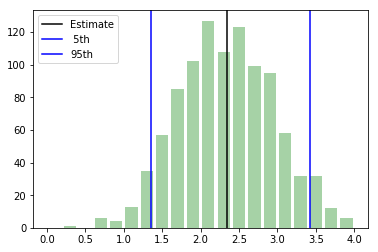

In [91]:
# Create the bootstrap distribution of speeds
resample_speeds = compute_resample_speeds(distances, times)
speed_estimate = np.mean(resample_speeds)
percentiles = np.percentile(resample_speeds, [5, 95])

# Plot the histogram with the estimate and confidence interval
fig, axis = plt.subplots()
hist_bin_edges = np.linspace(0.0, 4.0, 21)
axis.hist(resample_speeds, hist_bin_edges, color='green', alpha=0.35, rwidth=0.8)
axis.axvline(speed_estimate, label='Estimate', color='black')
axis.axvline(percentiles[0], label=' 5th', color='blue')
axis.axvline(percentiles[1], label='95th', color='blue')
axis.legend()
plt.show()

Beautiful! Notice that vertical lines marking the 5th (left) and 95th (right) percentiles mark the extent of the confidence interval, while the speed estimate (center line) is the mean of the distribution and falls between them. Note the speed estimate is the mean, not the median, which would be 50% percentile.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Test Statistics and Effect Size</h1><div class=""><p><p>How can we explore linear relationships with bootstrap resampling? Back to the trail! For each hike plotted as one point, we can see that there is a linear relationship between total distance traveled and time elapsed. It we treat the distance traveled as an "effect" of time elapsed, then we can explore the underlying connection between linear regression and statistical inference.</p>
<p>In this exercise, you will separate the data into two populations, or "categories": early times and late times. Then you will look at the <strong><em>differences</em></strong> between the total distance traveled within each population. This <strong><em>difference</em></strong> will serve as a "test statistic", and it's distribution will test the effect of separating distances by times.</p>
<p><img src="http://assets.datacamp.com/production/repositories/1480/datasets/9f46005f9dbef3c762a4a1a531488511a8d99833/ch04_ex11_fig03.png" alt="ch04_ex11_fig03.png"></p></div></div>

In [92]:
sample_distances = np.array([0.13200726818379974, 0.0, 0.0, 0.0, 0.46814950645789716, 0.0, 0.24079754458835892, 0.29859395269610234, 0.34472237653067583, 0.4148293605662493, 0.21365292532246472, 0.0, 0.19648647331282623, 0.08120946375045007, 0.47181156951888104, 0.5324299061506482, 0.36836906905281896, 0.6355772763104071, 0.5012649546178813, 0.5807012234648521, 0.5905216262010535, 0.7201159098504062, 0.4292616827446074, 0.4762143881621754, 1.043908187188824, 0.8173580851246416, 0.7761160555062308, 0.7442680962404971, 0.20059962497455897, 0.295442568246321, 0.5275407113754333, 0.3142700304790461, 1.041699130985138, 1.0145587422677267, 1.0198106684051196, 1.0431378669325237, 1.1465601615674164, 0.9676484224395447, 1.3275184222710017, 0.9059990313150086, 0.6205758733971536, 0.8908184800815595, 1.1287860838538841, 1.3547729158701367, 1.143775654631452, 1.265933285310141, 1.5535453740645706, 0.7980764345418765, 1.196357088006664, 0.8391731572414135, 1.5824829526857196, 1.0693760265260819, 0.7069333854815386, 1.0483671212501537, 1.5162589202068608, 0.9414127588336869, 0.9623931077229337, 1.0527065729630802, 1.278003534388297, 0.4115675276079167, 1.1453119311977367, 1.4204798367848728, 1.3214438365079328, 1.203217287858782, 1.552644113365787, 0.9195379375008009, 1.1175795970763938, 0.8083105479213026, 0.7282396144084282, 1.681296069075378, 1.0642130827202538, 1.0457823048351995, 1.9082690518811816, 1.9240235750501113, 1.2052067193035707, 0.9742519218663702, 1.580744366713706, 2.066029559226103, 2.28950243804116, 2.1747603705160223, 2.379496458595313, 2.0399908362865973, 1.461926106560834, 1.7874173678309102, 2.525492665065931, 2.1027831021606516, 2.1185335236978, 1.1786614841306595, 1.8936663147748507, 1.9933311727875318, 1.8713233326355962, 2.614560927540169, 2.914926872073268, 1.900019665919535, 2.699384440493067, 1.4940169950010862, 1.959204307737915, 1.7743378134101835, 1.4898913998562482, 1.7209424606248318, 2.5789463702032975, 1.9567169816591232, 1.406875990061149, 1.395254903667453, 1.6860742319990636, 2.0256376467287636, 2.1834665915398945, 2.3896583093732544, 1.3049755536862526, 2.1659949682150685, 1.672217233278087, 1.7282526359591073, 3.2958662209491445, 2.3710374480854224, 2.8654043731376735, 2.1633294813636845, 3.152860830040386, 2.137887659867484, 2.3428225795576645, 1.6221618468037826, 1.212579669371028, 3.268683892333744, 2.3382700156826526, 2.1377369024169277, 1.831610296598025, 3.520002262114262, 3.04090738899232, 2.4410564365572878, 1.7837229138888364, 3.8477587123461707, 2.2077601877104898, 2.0869004626773386, 2.6044557468225267, 2.4970090331214445, 1.7688425895217361, 3.4404642489542985, 2.05322405355723, 2.790993216984284, 3.3861774478385094, 3.3281565246597298, 2.8417878456746783, 3.161483875639804, 2.2975232902573026, 2.9506451201045403, 2.4713824858212257, 3.1808087888906362, 2.531601287625527, 2.5734931050641245, 3.043846988019672, 3.7127021355791294, 2.840946245983165, 2.5341065061571846, 2.237662997614005, 3.164290200334487, 3.253930954183758, 2.888971227670837, 4.237107581179339, 3.522266494985817, 1.5901884426657527, 3.3041484047404555, 3.680274262887317, 3.035162216629869, 3.809644619004117, 4.743909029620081, 2.7660862477035026, 3.099316629371711, 1.9709174528729383, 3.0446964028986607, 2.3409501628416463, 3.316198064653894, 3.7708291558967932, 3.879089907456342, 3.5463071122380896, 2.419294046476592, 2.6966587471336543, 3.8920634550432203, 4.822909281106691, 3.0721431853514556, 3.800823056730377, 2.554572549223847, 2.0872299088573785, 3.432298056032487, 2.703696866857655, 3.565449401799512, 3.4992409061092835, 3.9301407664838934, 4.778219221896977, 3.0634181418904944, 4.687600395173488, 3.66696296586763, 4.04560669597838, 3.923816918373676, 3.67721647230442, 5.687300908730166, 2.1014498632982925, 3.9181328681766865, 3.4144833820958436, 4.885442332490644, 3.8829627396225628, 5.823917516287759, 4.5946252199039215, 5.398934914970219, 3.103964497395904, 3.928041608253565, 3.3810597024755205, 3.533468518054589, 2.3543413487817277, 2.7372081021803636, 2.830476844101863, 3.4030198587687486, 2.8997093635153, 3.6718021500316302, 3.613508124710397, 4.840035281872325, 3.853304221998841, 3.4758060958561416, 5.378032681697686, 3.201453793866457, 5.357570632790407, 5.621331334600578, 3.490134377898462, 2.775607243487086, 4.751528676166793, 4.211469121012607, 3.154171324538643, 2.2740114814243633, 6.086806695916881, 4.531238857223272, 4.961326879415553, 2.369398026509817, 5.35714978138661, 4.044978090658525, 5.7705261909176215, 3.5351627824643375, 5.848840466437197, 4.305933025442195, 5.937480944744287, 3.7140259081470646, 5.496053052226014, 6.3516005824791435, 3.986498753762609, 4.8436757199231, 5.03046519673673, 1.929107860361639, 4.612768796658284, 4.086435385819438, 4.488354726374981, 7.154093980767524, 4.731500962704853, 8.154179870060252, 4.679775062457909, 0.750747145554846, 3.8643720323220743, 4.394235771850125, 5.276297618012961, 5.893643135097764, 3.2514859058503, 6.746224591066669, 5.6669840424859785, 6.384055951127968, 4.8997480731668865, 7.133630552898925, 5.905642655534044, 6.811647924681494, 6.284529047939876, 4.361703024876233, 5.831283806498731, 3.5539474495716803, 5.59282083898627, 6.14924726416375, 5.972410685772361, 4.863392374814656, 5.950216939189702, 5.007432992236836, 5.00510523480697, 4.866322553490426, 6.422709063562655, 6.799741577425826, 6.355936767481514, 6.178944741246771, 6.902481190567183, 6.566954929071503, 6.254313485475025, 4.997044301823281, 5.862053239793654, 3.0742600854938966, 5.754574736738182, 3.1891100051217482, 4.530265463035889, 5.286052846702782, 6.074648141903096, 6.087884305617907, 5.671919057416371, 5.397109255450536, 6.209064118301568, 5.013077058893888, 5.582789027341182, 4.33306948558164, 7.456254219934738, 5.739148547151533, 6.747465800289268, 7.3431413979836195, 3.5702324735726965, 6.9542141271296085, 9.128691075918889, 6.940361752576594, 7.487298411020492, 4.854685321296703, 5.4839472300483285, 6.924873288351539, 5.713415635627924, 8.7280255940699, 4.598925436029063, 7.134780445356624, 5.580405805058388, 2.6578025449126117, 5.915346051009402, 9.75483318129711, 7.101923436899766, 6.4730247077541865, 8.20788976151701, 5.2966337793811284, 9.647444635775578, 8.100648673973653, 5.102595179177672, 4.965229482766185, 7.590266650762891, 4.257554564271167, 6.152369290219344, 9.430061617367134, 6.29798358275028, 4.354075784196459, 10.755659003187255, 5.495136569320611, 5.7988635382102505, 5.619489533811189, 5.464721508229359, 8.889294355117338, 6.524459619472009, 8.341812339072586, 7.740852217244828, 7.941419913045629, 7.936476508047976, 5.021915165799269, 6.704329341227281, 7.517313773081496, 7.286704223509861, 6.397360277274674, 6.8427084936424, 7.127102368881132, 7.10175323454276, 7.708359599269982, 6.851187835071207, 6.406019952521314, 7.842919416445138, 4.718771938158463, 7.5966299761225144, 5.518847595048554, 8.425539613534909, 6.820710882339967, 6.398780429026168, 2.561527428690387, 7.025673170535961, 7.9595047525802824, 4.637899212295038, 5.80676332742485, 4.158078835977674, 5.89371642371785, 4.85200998821873, 7.949783610597787, 9.197318776741485, 9.776042533400275, 7.561053024841599, 6.101487073713352, 5.507122515988182, 7.769950576029055, 8.051378360196223, 5.849828296106427, 7.298717783716532, 10.16901812692444, 5.701529573953601, 5.524608926741863, 7.294329722800708, 3.6865685974986167, 7.791068730866898, 8.040970489899273, 9.295312487282118, 9.428152813315046, 5.094757521993131, 7.1866029386213945, 9.697356565834644, 9.361712037556984, 7.115677034342136, 10.8260152480162, 6.434928006572747, 9.735326109099958, 9.790305869074402, 8.41727789347311, 8.609843847646433, 8.696801062660462, 6.429499928125361, 6.558189688516312, 7.315987082660253, 4.546395379289426, 10.917519688802408, 6.637902781780534, 10.30715635217287, 6.297693542227606, 8.889696644712792, 7.951666346883079, 8.210494008624009, 4.298095192099842, 7.0667575137250545, 8.177973890377944, 6.388575100953454, 9.298907206822307, 10.242797095535522, 12.278962774822366, 6.669208293265173, 4.184078093313965, 6.897540570679851, 6.900766684909897, 5.015442525287883, 7.681962148141907, 10.16840060049882, 9.80613482807611, 6.258997201362623, 9.584953349737539, 10.227159167601725, 8.145371643083484, 7.682506865861244, 9.846382881894655, 10.506637129204474, 12.34019557635546, 9.537049407119325, 7.240117135714031, 7.78209017191464, 6.85261792187194, 8.158092171910235, 7.867279761293265, 6.171793373577399, 11.590593529665444, 9.017275846413252, 8.938883849197287, 8.623879943979832, 6.72298649272796, 7.625318253481243, 8.728990884549944, 8.698323908368293, 9.60906748293725, 8.422207793426097, 8.676425047509834, 9.035423512254116, 7.8045903814717805, 8.175287782629104, 8.944685222178263, 10.309572070032804, 8.062404738821446, 9.633981640303041, 10.865269922960632, 10.67349088913589, 6.933201445074679, 8.093512260037468, 7.952714665333568, 11.398052672730032, 11.224641251225414, 8.311615117049358, 7.693132080421408, 11.31578956573585, 11.737396772056254, 6.567190616700437, 6.328876942360557, 10.341977448790692, 11.077448304832172, 7.3201903093236, 8.491152113069692, 7.530310743080621, 10.503771434117205, 9.510882525464195, 10.25730919892973, 10.570727594274695, 9.945981452591408, 13.028520710492167, 10.782360132060969, 11.921764447422468, 9.024121454051727, 14.29109922692379, 9.826287981742928, 10.700156352999056, 9.556390887609966, 12.3590743549499, 9.912643516469434, 6.202598932987144, 13.79182334923509, 12.854902364907582, 10.017470344679653, 10.989660626434757, 9.244675493883703, 10.253839139658997, 8.813027785529718, 9.710954315423992, 7.223818003975483, 12.986386892701846, 12.996929907617103, 7.736926662877417, 9.762279403518248, 12.130473016432111, 8.788487129999838, 8.02524611963137, 11.715137251929278, 10.458045241680091, 8.2805670284301, 8.881674987975437, 9.338699622970228, 11.294765346163608, 7.876232077625305, 12.983023217415434, 11.20251176980083, 10.254163146184995, 11.479556915777568, 9.255187499585483, 11.57623195339082, 9.350402535946232, 11.16600062440488, 10.287131839626795, 11.0126533563746, 10.82656392393659, 8.457226288220642, 9.582909102537682, 9.717323392698878, 9.439354585706463, 9.519732542719192, 9.720470909268705, 10.363039640810834, 9.020335750252594, 10.617780858582003, 9.688110931611128, 12.064890654249218, 7.218092975996179, 9.069082072812146, 13.61769939058136, 12.455608301607615, 12.348077019071345, 11.256867585931774, 14.302337388868809, 8.62599779199925, 9.851838452434414, 13.238660171387483, 10.697388689277394, 11.448659140041688, 7.5207371935165455, 12.97000917642753, 7.827884254937445, 11.97421108946576, 9.4529941252271, 9.686787443585953, 12.948207461292617, 11.503000781544284, 15.162354915218526, 14.107274833657723, 11.801464584789832, 12.562488785138047, 9.853119665202062, 13.468747993855851, 11.897554211246597, 9.264267211838773, 10.024379313048067, 5.287937856978045, 12.33143958129986, 12.565484483618183, 13.677461762655735, 10.609280247868861, 12.129711982365903, 9.63518828340193, 10.41572102069771, 12.05781395828938, 11.899420772355299, 11.999136236372483, 12.642925156518956, 14.140874679046698, 9.262389906432453, 10.282491404325615, 13.955169651129896, 11.045635633421087, 16.230371263577336, 9.073971589251267, 14.717968139889756, 11.000604721807811, 11.849124096600477, 13.52701805324481, 11.889988033543943, 11.899913542617844, 11.997189118493266, 10.2789214223108, 9.625682682238871, 11.788440045796776, 10.880627952836862, 13.993672998255038, 15.18350194403855, 8.280033781989575, 9.381754097012905, 10.857427702994084, 13.13068880100041, 12.57924504607282, 12.903152493957172, 9.579298814352047, 12.591819410594283, 12.960858375411409, 16.98861081130029, 11.132234725008312, 10.828939440186181, 12.36398704768975, 10.611128955499158, 10.513091458506564, 15.216578816987887, 13.929365522430178, 11.886406052139316, 15.177886846477922, 10.092472302279734, 10.62983428318554, 13.640781304982184, 10.643232405834043, 14.655917457398726, 11.191313135361328, 9.712600895003872, 8.43449587274389, 12.125957688151427, 11.30595642890128, 16.785066183141563, 17.45655598070279, 14.772913591761105, 15.247147012936091, 11.640777871067288, 9.988124826240647, 10.178611303760261, 14.860524125626641, 11.555459565243028, 13.45509868362321, 16.645223332213522, 9.582735639960482, 14.79421803796384, 12.381376517531583, 12.68759044602183, 15.749609372166459, 10.683788256090141, 11.598474062200813, 12.145623667156226, 14.018114116603465, 11.188476755771168, 16.792369701559213, 14.919540360209929, 15.51281348410286, 13.970111205122535, 10.350317586492961, 12.3362058304151, 12.199774981419404, 13.131340384985792, 13.11873418342738, 16.179445363264115, 15.416134962750775, 10.122730884980587, 12.142674020724202, 14.228517233289171, 12.322476690264693, 14.705870175654862, 12.100555274460174, 15.427297951567109, 10.01008473508708, 14.666316701113466, 17.742571487903426, 15.26978010082313, 13.051344708070262, 11.846257716621917, 17.404413081059857, 14.831656009986556, 10.286503232451777, 11.025685931042993, 16.466307148176618, 15.08187131718702, 15.124192765636598, 11.347797067259894, 13.828338183134129, 14.665266382176945, 12.63938610258001, 12.512808563742963, 15.256577635951516, 10.133562554755263, 13.911322678028384, 11.23571084436365, 15.424174621636967, 17.370736402634186, 16.641772610904397, 17.72409808275031, 9.416074532951612, 16.53515877796788, 12.219538538741084, 16.67547274171797, 13.462187988312834, 15.159666739811268, 13.72042993511432, 11.375805506232943, 15.883243788614463, 14.897637183950136, 10.580922157409987, 14.158695666028423, 16.411946983522675, 14.08076608818799, 17.96838510629272, 15.928897773775583, 19.60090750579959, 14.731607456999933, 14.311427651759896, 11.959920059417472, 14.64104662167151, 10.897858573315965, 13.385234169188113, 11.490585764214899, 14.080602482332653, 12.196949560409152, 13.965579555585604, 14.719211284880974, 14.958898935381367, 15.256520718029721, 13.521116918686516, 10.684536061155018, 15.06458333797508, 13.23162739843199, 17.349961774141004, 13.001124679463619, 14.610851223533432, 12.766033238839794, 11.058523360664596, 14.296688472811367, 12.113316440561968, 13.952252637787634, 16.075409309619612, 14.781093011958427, 16.540247458510798, 14.149277956762639, 11.182855768523108, 16.444150956499737, 12.531180555870582, 10.749185459534827, 18.53090914332056, 17.508229016606208, 14.821343019850717, 12.864659481252664, 10.160386246039803, 17.057109491904683, 11.661501770630723, 16.8661230914327, 15.934944143364334, 14.370368193741685, 14.961895498864083, 16.612650964610836, 15.625349305067568, 17.121689309795723, 15.203734027520655, 15.95503481386288, 10.717672753047387, 15.680505589795187, 13.114363518911489, 16.45526958357895, 15.315331437017278, 16.89495799749228, 13.842244417094452, 15.59994265906198, 17.401847506475374, 13.963712445303454, 12.716537292909834, 13.757075660999636, 18.37385634520181, 16.571024158022933, 13.168890301460497, 18.787255380697495, 17.48491831737429, 16.095181306503996, 13.22819379057375, 14.106457634781783, 13.845200697047948, 14.02546265649476, 15.668152081888774, 17.44402146742399, 14.045681157427104, 14.4124577050315, 19.360950777832336, 14.363204559454779, 14.098934584619947, 13.972479365214493, 15.499514651065166, 12.926565095420056, 14.7405212979256, 17.74462464008065, 17.21536957452582, 14.229326541630089, 17.331514037068914, 15.851654266703939, 16.46348568511082, 19.839652922662655, 14.922580196161253, 15.406697347393115, 13.627812974731032, 16.867639783365334, 13.720344869660416, 18.40649822537672, 13.136538978582465, 16.199009855097728, 17.584304709626565, 16.609858813294704, 16.091456919682336, 15.067722289568872, 11.069216491183244, 17.793621488526973, 13.756178765937516, 16.341115183764458, 14.751745709469308, 16.918626745275333, 15.319368971431125, 14.307433761943056, 14.57354548830406, 16.675537640793998, 16.97392236782802, 17.80782170440122, 12.612413200714535, 10.818463226922523, 18.648546280999238, 18.385843468557503, 18.48320413017692, 18.713642000494122, 15.535168711388527, 17.316699490343368, 16.918560979668253, 14.68137249564476, 22.22405588442917, 13.01326406480294, 15.29626339744306, 16.27809924210799, 15.595775487249771, 14.920897875836335, 16.40777203767425, 18.0737616458473, 15.012059248630935, 16.912175841751633, 19.902610999981135, 16.46240853651892, 19.947549321316107, 16.30537579554098, 19.11919474805752, 16.73256034525832, 12.903410438198438, 13.156165510573112, 18.517514641002794, 15.69382811338277, 17.136374874610958, 13.516789969380458, 17.595599538805388, 16.190853460648263, 15.95844732461246, 13.619121132318451, 16.48033039904277, 18.180229607936266, 16.512671400731215, 13.724908140984768, 16.514215846088685, 15.491428645258383, 18.793156726710993, 18.852318070998486, 15.352902511156751, 17.079449990062674, 20.113155341560415, 16.339317033025264, 18.583300061169272, 18.50511669238351, 14.719302922326476, 16.947008758074258, 19.120283088799404, 21.69107753650683, 19.053077923119023, 17.696319304021724, 17.126249516877323, 18.801630605852413, 18.35486740976142, 16.218099660169457, 19.134289994015347, 19.925155405710203, 18.360428424507013, 15.448741462823076, 18.412226010374635, 18.031761209818924, 18.466068768262286, 20.654875793957146, 20.66056239343571, 18.158000413793047, 16.36248214300073, 24.0688645552882, 19.474833631133876, 17.022271271815278, 19.957886946935457, 18.862285622816486, 16.35792717334081, 15.131010612304046, 17.549643306707257, 17.284001649040775, 18.295363525789014, 18.841253092551817, 18.124355831183692, 16.688639843735345, 21.67486084142853, 19.876557450250104, 19.157018192451474, 20.025496713401072, 21.157816750306736, 17.77066666782696, 18.78524154520434, 20.897022307881322, 14.194634697035626, 19.070557168374194, 16.48488544759171, 19.54578993553644, 16.94699877662567, 18.14524721019525, 19.13267814655045, 19.34390267347596, 15.616191366438445, 20.748831984009563, 16.083124468169217, 18.16807700726722, 16.956165839972265, 16.891845873916942, 21.070436900981104, 14.592063105328261, 20.46395568435256, 17.961836429032765, 17.43356717490002, 20.794781804003982, 18.90161501372492, 17.796213063025014, 22.13403139703172, 16.508670613311693, 17.32924356632091, 17.242003629425554, 18.072118374910392, 20.219660622829903, 18.76670862036295, 15.10050903595533, 17.11878508212216, 18.637195948662004, 20.551729755813415, 19.325754647626617, 21.014939908550126, 16.06739162875137, 17.359653507551883, 16.034188587620253, 21.482231883789574, 18.88157320065467, 20.31951944559825, 19.86226530156689, 19.87045425685976, 18.044776376414887, 17.136786986162257, 21.694767183929187, 17.82172160481603, 18.320796476360808, 19.619176447486176, 19.687449003797486, 21.59999876784765, 21.32271653214715, 17.7741085371486, 19.800615395871908, 21.99298877813401, 20.080778376856568, 19.164583623929204, 20.934852896495286, 20.64235546630653, 19.035151114620845, 19.65388193619047, 15.819629232179034, 18.26415695114103, 19.480853863255813, 19.115969145189823, 22.43923984057495, 23.41184022943457, 20.390033138133134, 21.508618120102167, 19.93364384800327, 20.569009443753696, 21.237716611776055, 19.058554373423704, 24.23536424383733, 18.690146294160574, 18.595898214101748, 21.8510564205956, 19.915088173030014, 19.095395089224983, 21.907518067699154, 17.78212344566469, 20.920428675344755, 19.95192933390421, 18.468326213409224, 20.16893669320775, 21.002286021609947])
sample_times = np.array([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.1300000000000001, 1.1400000000000001, 1.1500000000000001, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.3800000000000001, 1.3900000000000001, 1.4000000000000001, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.6300000000000001, 1.6400000000000001, 1.6500000000000001, 1.6600000000000001, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.8800000000000001, 1.8900000000000001, 1.9000000000000001, 1.9100000000000001, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.0100000000000002, 2.02, 2.0300000000000002, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1, 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2, 2.21, 2.22, 2.23, 2.24, 2.25, 2.2600000000000002, 2.27, 2.2800000000000002, 2.29, 2.3000000000000003, 2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4, 2.41, 2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.5100000000000002, 2.52, 2.5300000000000002, 2.54, 2.5500000000000003, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.7600000000000002, 2.77, 2.7800000000000002, 2.79, 2.8000000000000003, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.0100000000000002, 3.02, 3.0300000000000002, 3.04, 3.0500000000000003, 3.06, 3.0700000000000003, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.2600000000000002, 3.27, 3.2800000000000002, 3.29, 3.3000000000000003, 3.31, 3.3200000000000003, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.41, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.5100000000000002, 3.52, 3.5300000000000002, 3.54, 3.5500000000000003, 3.56, 3.5700000000000003, 3.58, 3.59, 3.6, 3.61, 3.62, 3.63, 3.64, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.71, 3.72, 3.73, 3.74, 3.75, 3.7600000000000002, 3.77, 3.7800000000000002, 3.79, 3.8000000000000003, 3.81, 3.8200000000000003, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.89, 3.9, 3.91, 3.92, 3.93, 3.94, 3.95, 3.96, 3.97, 3.98, 3.99, 4.0, 4.01, 4.0200000000000005, 4.03, 4.04, 4.05, 4.0600000000000005, 4.07, 4.08, 4.09, 4.1, 4.11, 4.12, 4.13, 4.14, 4.15, 4.16, 4.17, 4.18, 4.19, 4.2, 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.2700000000000005, 4.28, 4.29, 4.3, 4.3100000000000005, 4.32, 4.33, 4.34, 4.3500000000000005, 4.36, 4.37, 4.38, 4.39, 4.4, 4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5, 4.51, 4.5200000000000005, 4.53, 4.54, 4.55, 4.5600000000000005, 4.57, 4.58, 4.59, 4.6000000000000005, 4.61, 4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7, 4.71, 4.72, 4.73, 4.74, 4.75, 4.76, 4.7700000000000005, 4.78, 4.79, 4.8, 4.8100000000000005, 4.82, 4.83, 4.84, 4.8500000000000005, 4.86, 4.87, 4.88, 4.89, 4.9, 4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.0, 5.01, 5.0200000000000005, 5.03, 5.04, 5.05, 5.0600000000000005, 5.07, 5.08, 5.09, 5.1000000000000005, 5.11, 5.12, 5.13, 5.14, 5.15, 5.16, 5.17, 5.18, 5.19, 5.2, 5.21, 5.22, 5.23, 5.24, 5.25, 5.26, 5.2700000000000005, 5.28, 5.29, 5.3, 5.3100000000000005, 5.32, 5.33, 5.34, 5.3500000000000005, 5.36, 5.37, 5.38, 5.39, 5.4, 5.41, 5.42, 5.43, 5.44, 5.45, 5.46, 5.47, 5.48, 5.49, 5.5, 5.51, 5.5200000000000005, 5.53, 5.54, 5.55, 5.5600000000000005, 5.57, 5.58, 5.59, 5.6000000000000005, 5.61, 5.62, 5.63, 5.64, 5.65, 5.66, 5.67, 5.68, 5.69, 5.7, 5.71, 5.72, 5.73, 5.74, 5.75, 5.76, 5.7700000000000005, 5.78, 5.79, 5.8, 5.8100000000000005, 5.82, 5.83, 5.84, 5.8500000000000005, 5.86, 5.87, 5.88, 5.89, 5.9, 5.91, 5.92, 5.93, 5.94, 5.95, 5.96, 5.97, 5.98, 5.99, 6.0, 6.01, 6.0200000000000005, 6.03, 6.04, 6.05, 6.0600000000000005, 6.07, 6.08, 6.09, 6.1000000000000005, 6.11, 6.12, 6.13, 6.140000000000001, 6.15, 6.16, 6.17, 6.18, 6.19, 6.2, 6.21, 6.22, 6.23, 6.24, 6.25, 6.26, 6.2700000000000005, 6.28, 6.29, 6.3, 6.3100000000000005, 6.32, 6.33, 6.34, 6.3500000000000005, 6.36, 6.37, 6.38, 6.390000000000001, 6.4, 6.41, 6.42, 6.43, 6.44, 6.45, 6.46, 6.47, 6.48, 6.49, 6.5, 6.51, 6.5200000000000005, 6.53, 6.54, 6.55, 6.5600000000000005, 6.57, 6.58, 6.59, 6.6000000000000005, 6.61, 6.62, 6.63, 6.640000000000001, 6.65, 6.66, 6.67, 6.68, 6.69, 6.7, 6.71, 6.72, 6.73, 6.74, 6.75, 6.76, 6.7700000000000005, 6.78, 6.79, 6.8, 6.8100000000000005, 6.82, 6.83, 6.84, 6.8500000000000005, 6.86, 6.87, 6.88, 6.890000000000001, 6.9, 6.91, 6.92, 6.93, 6.94, 6.95, 6.96, 6.97, 6.98, 6.99, 7.0, 7.01, 7.0200000000000005, 7.03, 7.04, 7.05, 7.0600000000000005, 7.07, 7.08, 7.09, 7.1000000000000005, 7.11, 7.12, 7.13, 7.140000000000001, 7.15, 7.16, 7.17, 7.18, 7.19, 7.2, 7.21, 7.22, 7.23, 7.24, 7.25, 7.26, 7.2700000000000005, 7.28, 7.29, 7.3, 7.3100000000000005, 7.32, 7.33, 7.34, 7.3500000000000005, 7.36, 7.37, 7.38, 7.390000000000001, 7.4, 7.41, 7.42, 7.43, 7.44, 7.45, 7.46, 7.47, 7.48, 7.49, 7.5, 7.51, 7.5200000000000005, 7.53, 7.54, 7.55, 7.5600000000000005, 7.57, 7.58, 7.59, 7.6000000000000005, 7.61, 7.62, 7.63, 7.640000000000001, 7.65, 7.66, 7.67, 7.68, 7.69, 7.7, 7.71, 7.72, 7.73, 7.74, 7.75, 7.76, 7.7700000000000005, 7.78, 7.79, 7.8, 7.8100000000000005, 7.82, 7.83, 7.84, 7.8500000000000005, 7.86, 7.87, 7.88, 7.890000000000001, 7.9, 7.91, 7.92, 7.930000000000001, 7.94, 7.95, 7.96, 7.97, 7.98, 7.99, 8.0, 8.01, 8.02, 8.03, 8.040000000000001, 8.05, 8.06, 8.07, 8.08, 8.09, 8.1, 8.11, 8.120000000000001, 8.13, 8.14, 8.15, 8.16, 8.17, 8.18, 8.19, 8.2, 8.21, 8.22, 8.23, 8.24, 8.25, 8.26, 8.27, 8.28, 8.290000000000001, 8.3, 8.31, 8.32, 8.33, 8.34, 8.35, 8.36, 8.370000000000001, 8.38, 8.39, 8.4, 8.41, 8.42, 8.43, 8.44, 8.45, 8.46, 8.47, 8.48, 8.49, 8.5, 8.51, 8.52, 8.53, 8.540000000000001, 8.55, 8.56, 8.57, 8.58, 8.59, 8.6, 8.61, 8.620000000000001, 8.63, 8.64, 8.65, 8.66, 8.67, 8.68, 8.69, 8.700000000000001, 8.71, 8.72, 8.73, 8.74, 8.75, 8.76, 8.77, 8.78, 8.790000000000001, 8.8, 8.81, 8.82, 8.83, 8.84, 8.85, 8.86, 8.870000000000001, 8.88, 8.89, 8.9, 8.91, 8.92, 8.93, 8.94, 8.950000000000001, 8.96, 8.97, 8.98, 8.99, 9.0, 9.01, 9.02, 9.03, 9.040000000000001, 9.05, 9.06, 9.07, 9.08, 9.09, 9.1, 9.11, 9.120000000000001, 9.13, 9.14, 9.15, 9.16, 9.17, 9.18, 9.19, 9.200000000000001, 9.21, 9.22, 9.23, 9.24, 9.25, 9.26, 9.27, 9.28, 9.290000000000001, 9.3, 9.31, 9.32, 9.33, 9.34, 9.35, 9.36, 9.370000000000001, 9.38, 9.39, 9.4, 9.41, 9.42, 9.43, 9.44, 9.450000000000001, 9.46, 9.47, 9.48, 9.49, 9.5, 9.51, 9.52, 9.53, 9.540000000000001, 9.55, 9.56, 9.57, 9.58, 9.59, 9.6, 9.61, 9.620000000000001, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68, 9.69, 9.700000000000001, 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.790000000000001, 9.8, 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.870000000000001, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.950000000000001, 9.96, 9.97, 9.98, 9.99, 10.0])

In [93]:
def plot_test_statistic(x, label=""):
    plt.hist(x, density=True, bins=25)   
    plt.title("""  {} Test Statistic Distribution, 
    Mean={:0.1f}, Std Error = {:.2f}""".format(label, np.mean(x), np.std(x)))
    plt.xlim(-30,30)
    plt.show()
    return fig

Test Statistic: mean=10.08, stdev=4.69


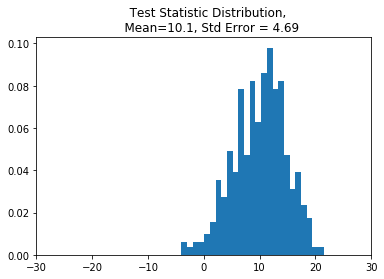

In [94]:
# Create two poulations, sample_distances for early and late sample_times.
# Then resample with replacement, taking 500 random draws from each population.
group_duration_short = sample_distances[sample_times < 5]
group_duration_long = sample_distances[sample_times > 5]
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)

# Difference the resamples to compute a test statistic distribution, then compute its mean and stdev
test_statistic = resample_long - resample_short
effect_size = np.mean(test_statistic)
standard_error = np.std(test_statistic)

# Print and plot the results
print('Test Statistic: mean={:0.2f}, stdev={:0.2f}'.format(effect_size, standard_error))
fig = plot_test_statistic(test_statistic)

Correct! Notice again, the test statistic is the difference between a distance drawn from short duration trips and one drawn from long duration trips. The distribution of difference values is built up from differencing each point in the early time range with one from the late time range. The mean of the test statistic is not zero and tells us that there is on average a difference in distance traveled when comparing short and long duration trips. Again, we call this the 'effect size'. The time increase had an effect on distance traveled. The standard error of the test statistic distribution is not zero, so there is some spread in that distribution, or put another way, uncertainty in the size of the effect.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Null Hypothesis</h1><div class=""><p><p>In this exercise, we formulate the null hypothesis as </p>
<blockquote>
  <p>short and long time durations have no effect on total distance traveled. </p>
</blockquote>
<p>We interpret the "zero effect size" to mean that if we shuffled samples between short and long times, so that two new samples each have a mix of short and long duration trips, and then compute the test statistic, on average it will be zero.</p>
<p>In this exercise, your goal is to perform the shuffling and resampling. Start with the predefined <code>group_duration_short</code> and <code>group_duration_long</code> which are the un-shuffled time duration groups.</p></div></div>

In [95]:
# Shuffle the time-ordered distances, then slice the result into two populations.
shuffle_bucket = np.concatenate((group_duration_short, group_duration_long))
np.random.shuffle(shuffle_bucket)
slice_index = len(shuffle_bucket)//2
shuffled_half1 = shuffle_bucket[0:slice_index]
shuffled_half2 = shuffle_bucket[slice_index+1:]

# Create new samples from each shuffled population, and compute the test statistic
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic = resample_half2 - resample_half1

# Compute and print the effect size
effect_size = np.mean(test_statistic)
print('Test Statistic, after shuffling, mean = {}'.format(effect_size))

Test Statistic, after shuffling, mean = 0.4710833981161658


Correct! Notice that your effect size is not exactly zero because there is noise in the data. But the effect size is much closer to zero than before shuffling. Notice that if you rerun your code, which will generate a new shuffle, you will get slightly different results each time for the effect size, but np.abs(test_statistic) should be less than about 1.0, due to the noise, as opposed to the slope, which was about 2.0

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing Test Statistics</h1><div class=""><p><p>In this exercise, you will approach the null hypothesis by comparing the <strong>distribution of a test statistic</strong> arrived at from two different ways.</p>
<p>First, you will examine two "populations", grouped by early and late times, and computing the test statistic distribution. Second, shuffle the two populations, so the data is no longer time ordered, and each has a mix of early and late times, and then recompute the test statistic distribution.</p>
<p>To get you started, we've pre-loaded the two time duration groups, <code>group_duration_short</code> and <code>group_duration_long</code>, and two functions, <code>shuffle_and_split()</code> and <code>plot_test_statistic()</code>.</p></div></div>

In [96]:
def shuffle_and_split(data1, data2):
    all_array = np.concatenate((data1, data2))
    np.random.shuffle(all_array)
    half = int(len(all_array)/2)
    return all_array[:half], all_array[half:] 

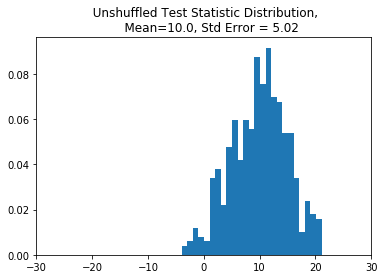

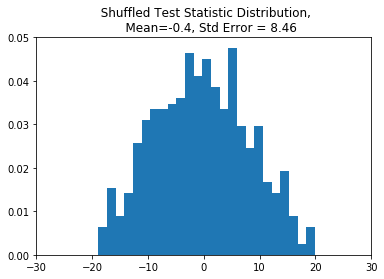

In [97]:
# From the unshuffled populations, compute the test statistic distribution
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)
test_statistic_unshuffled = resample_long - resample_short

# Shuffle two populations, cut in half, and recompute the test statistic
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic_shuffled = resample_half2 - resample_half1

# Plot both the unshuffled and shuffled results and compare
fig = plot_test_statistic(test_statistic_unshuffled, label='Unshuffled')
fig = plot_test_statistic(test_statistic_shuffled, label='Shuffled')

Outstanding! Notice that after you shuffle, the effect size went almost to zero and the spread increased, as measured by the standard deviation of the sample statistic, aka the 'standard error'. So shuffling did indeed have an effect. The null hypothesis is disproven. Time ordering does in fact have a non-zero effect on distance traveled. Distance is correlated to time.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing the P-Value</h1><div class=""><p><p>In this exercise, you will visualize the p-value, the chance that the effect (or "speed") we estimated, was the result of random variation in the sample. Your goal is to visualize this as the fraction of points in the shuffled test statistic distribution that fall to the right of the mean of the test statistic ("effect size") computed from the unshuffled samples.</p>
<p>To get you started, we've preloaded the <code>group_duration_short</code> and <code>group_duration_long</code> and functions <code>compute_test_statistic()</code>, <code>shuffle_and_split()</code>, and <code>plot_test_statistic_effect()</code></p></div></div>

In [98]:
def compute_test_statistic(group1, group2):
    bucket = np.concatenate((group1, group2))
    slice_index = len(bucket)//2
    half1 = bucket[0:slice_index]
    half2 = bucket[slice_index+1:]
    resample_half1 = np.random.choice(half1, size=500, replace=True)
    resample_half2 = np.random.choice(half2, size=500, replace=True)
    test_statistic = resample_half2 - resample_half1
    return test_statistic

In [99]:
def plot_test_statistic(x, label=""):
    plt.hist(x, density=True, bins=25)   
    plt.title("""  {} Test Statistic Distribution, 
    Mean={:0.1f}, Std Error = {:.2f}""".format(label, np.mean(x), np.std(x)))
    plt.xlim(-30,30)
    plt.show()
    return fig

In [100]:
def plot_test_stats_and_pvalue(test_statistic_unshuffled, test_statistic_shuffled):
    effect_size = np.mean(test_statistic_unshuffled)
    condition = test_statistic_shuffled >= effect_size
    p_value = len(test_statistic_shuffled[condition]) / len(test_statistic_shuffled)
    plt.hist(test_statistic_unshuffled, density=False, bins=25) 
    plt.hist(test_statistic_shuffled, density=False, bins=25) 
    plt.vlines(effect_size, 0, 50)
    plt.title("""  Test Statistic Distribution, 
    Effect Size={:0.1f}, p-value = {:.2f}""".format(effect_size,p_value))
    
    plt.xlim(-30,30)
    plt.show()
    return fig

The p-value is = 0.146


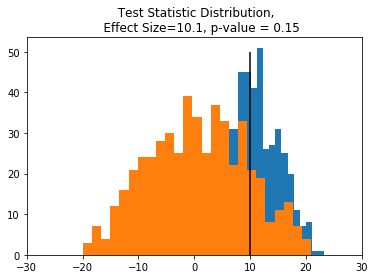

In [101]:
# Compute the test stat distribution and effect size for two population groups
test_statistic_unshuffled = compute_test_statistic(group_duration_short, group_duration_long)
effect_size = np.mean(test_statistic_unshuffled)

# Randomize the two populations, and recompute the test stat distribution
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
test_statistic_shuffled = compute_test_statistic(shuffled_half1, shuffled_half2)

# Compute the p-value as the proportion of shuffled test stat values >= the effect size
condition = test_statistic_shuffled >= effect_size
p_value = len(test_statistic_shuffled[condition]) / len(test_statistic_shuffled)

# Print p-value and overplot the shuffled and unshuffled test statistic distributions
print("The p-value is = {}".format(p_value))
fig = plot_test_stats_and_pvalue(test_statistic_unshuffled, test_statistic_shuffled)

Well done! Note that the entire point of this is compute a p-value to quantify the chance that our estimate for speed could have been obtained by random chance. On the plot, the unshuffle test stats are the distribution of speed values estimated from time-ordered distances. The shuffled test stats are the distribution of speed values computed from randomizing unordered distances. Values of the shuffled stats to the right of the mean non-shuffled effect size line are those that both (1) could have both occured randomly and (2) are at least as big as the estimate you want to use for speed.